<a href="https://colab.research.google.com/github/ckhamitkar/PythonCode/blob/main/EasyVisa_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Installation
# Install necessary libraries with specified versions. The '-q' flag means quiet installation.
# '--user' installs packages into the user's home directory.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

# Global Configurations & Warnings
# Import the warnings module to manage warnings.
import warnings
# Filter out all warnings to ensure cleaner output.
warnings.filterwarnings("ignore")

# Import pandas for data manipulation and analysis.
import pandas as pd
# Set pandas option to display all columns without truncation.
pd.set_option("display.max_columns", None)
# Set pandas option to display up to 100 rows without truncation.
pd.set_option("display.max_rows", 100)

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
# Import numpy for numerical operations, especially array manipulation.
import numpy as np
# Import matplotlib.pyplot for plotting and visualization.
import matplotlib.pyplot as plt
# Import seaborn for advanced statistical data visualization.
import seaborn as sns

In [3]:
# Import train_test_split for splitting data into training and testing sets.
# Import StratifiedKFold for stratified cross-validation.
# Import cross_val_score for evaluating model performance using cross-validation.
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# Import SMOTE for oversampling to handle imbalanced datasets.
from imblearn.over_sampling import SMOTE
# Import RandomUnderSampler for undersampling to handle imbalanced datasets.
from imblearn.under_sampling import RandomUnderSampler

In [4]:
# Import DecisionTreeClassifier for building a Decision Tree model.
from sklearn.tree import DecisionTreeClassifier
# Import various ensemble classifiers for building robust models.
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
# Import XGBClassifier for Extreme Gradient Boosting.
from xgboost import XGBClassifier

In [5]:
# Hyperparameter Tuning
# Import RandomizedSearchCV for hyperparameter tuning using random search.
from sklearn.model_selection import RandomizedSearchCV

# Metrics
# Import sklearn.metrics for various model evaluation metrics.
from sklearn import metrics
# Import specific metrics for evaluating classification model performance.
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

In [6]:
from scipy.stats import zscore

## Import Dataset

In [7]:
# Import drive from google.colab to mount Google Drive.
from google.colab import drive
# Mount Google Drive to access files stored there.
drive.mount('/content/drive')
# Read the CSV file into a pandas DataFrame.
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Project_Human_Resources/EasyVisa.csv')
# Create a copy of the original DataFrame for backup or later use.
datacopy = df.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [8]:
# Display the first 5 rows of the DataFrame to get an initial look at the data.
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [9]:
# Display the last 5 rows of the DataFrame.
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [10]:
# Display the number of rows and columns in the DataFrame.
df.shape

(25480, 12)

There are 25480 rows and 12 columns

#### Check the data types of the columns for the dataset

In [11]:
# Display a concise summary of the DataFrame, including data types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [12]:
df.duplicated().sum()

np.int64(0)

**No Duplicates found**

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [13]:
# Display descriptive statistics for all columns (including object type columns).
df.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV25480,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


#### Fixing the negative values in number of employees columns

In [14]:
print("Number of entries with negative 'no_of_employees' before correction:", df[df['no_of_employees'] < 0].shape[0])
# Store the rows with negative 'no_of_employees' before correction
df_negative_employees = df[df['no_of_employees'] < 0]

# Convert negative values in 'no_of_employees' to their absolute value.
df['no_of_employees'] = df['no_of_employees'].abs()

# Check if any negative values remain after the operation.
print("Number of entries with negative 'no_of_employees' after correction:", df[df['no_of_employees'] < 0].shape[0])

# Display the rows that originally had negative values (for verification).
if not df_negative_employees.empty:
    print("\nOriginal rows with negative 'no_of_employees' values:")
    print(df_negative_employees)

Number of entries with negative 'no_of_employees' before correction: 33
Number of entries with negative 'no_of_employees' after correction: 0

Original rows with negative 'no_of_employees' values:
         case_id      continent education_of_employee has_job_experience  \
245      EZYV246         Europe              Master's                  N   
378      EZYV379           Asia            Bachelor's                  N   
832      EZYV833  South America              Master's                  Y   
2918    EZYV2919           Asia              Master's                  Y   
6439    EZYV6440           Asia            Bachelor's                  N   
6634    EZYV6635           Asia            Bachelor's                  Y   
7224    EZYV7225         Europe             Doctorate                  N   
7281    EZYV7282           Asia           High School                  N   
7318    EZYV7319           Asia            Bachelor's                  Y   
7761    EZYV7762           Asia            

#### Let's check the count of each unique category in each of the categorical variables

In [15]:
# Selects all columns from the DataFrame `df` that have an object (string) data type.
cat_col = list(df.select_dtypes("object").columns)

# Loop through each categorical column to display the count of its unique values.
for column in cat_col:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("-" * 50) # Print a separator line for better readability.

Value counts for column: case_id
case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
Value counts for column: continent
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: education_of_employee
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: has_job_experience
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: requires_job_training
req

In [16]:
# The unique case_id does not add much value so dropping it
df.drop(["case_id"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

Dropped **case_id**

### Univariate Analysis

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Create a figure with two subplots, sharing the x-axis.
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    # Set a super title for the entire figure.
    f2.suptitle(f'Distribution and Boxplot of {feature}', fontsize=16)
    # Create a boxplot in the first subplot (ax_box2) to visualize central tendency and outliers.
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    # Create a histogram in the second subplot (ax_hist2) to visualize distribution.
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    # Add a vertical line for the mean of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    # Add a vertical line for the median of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show() # Display the plot

In [18]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # Get the total number of entries in the column.
    count = data[feature].nunique() # Get the number of unique categories.
    # Set figure size based on the number of unique categories or 'n'.
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15) # Rotate x-axis labels for better readability.
    # Set the title of the bar plot.
    plt.title(f'Distribution of {feature}', fontsize=16)
    # Create a countplot (bar plot) of the feature.
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Add labels (percentages or counts) on top of each bar.
    for p in ax.patches:
        if perc == True:
            # Calculate and format the percentage for each bar.
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            # Get the count for each bar.
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Calculate x-coordinate for the label.
        y = p.get_height()  # Get height for the label.

        # Annotate the bar with the calculated label.
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # Display the plot

In [19]:
def automated_univariate_analysis(df):
    # Initialize a list to store names of potential ID columns.
    potential_ids = []
    # Iterate through each column in the DataFrame.
    for col in df.columns:
        print(f"\n--- Analyzing Column: {col} ---")
        # Check if every row in the column has a unique value.
        if df[col].nunique() == len(df):
            print(f"Suggested columns to drop: {col}")
            potential_ids.append(col) # Add column to potential_ids list.
        else:
            # If the column is numeric and not identified as an ID column, perform histogram and boxplot.
            if pd.api.types.is_numeric_dtype(df[col]) and col not in potential_ids:
                histogram_boxplot(df, col)
                print(df[col].describe()) # Display descriptive statistics.

            # If the column is categorical and not identified as an ID column, perform labeled barplot.
            elif col not in potential_ids:
                labeled_barplot(df, col, perc=True) # Display barplot with percentages.
                print(df[col].value_counts(normalize=True) * 100) # Show category percentages.


--- Analyzing Column: continent ---


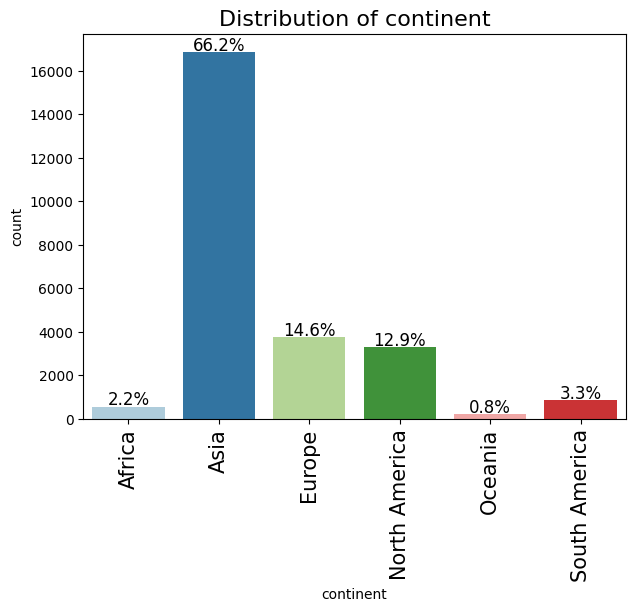

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

--- Analyzing Column: education_of_employee ---


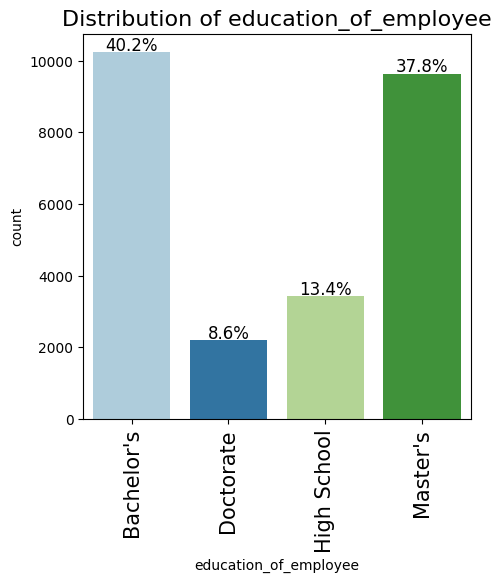

education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64

--- Analyzing Column: has_job_experience ---


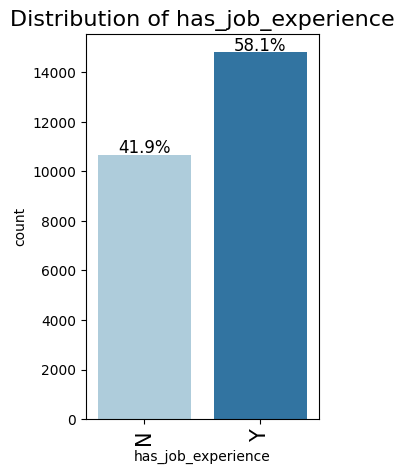

has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64

--- Analyzing Column: requires_job_training ---


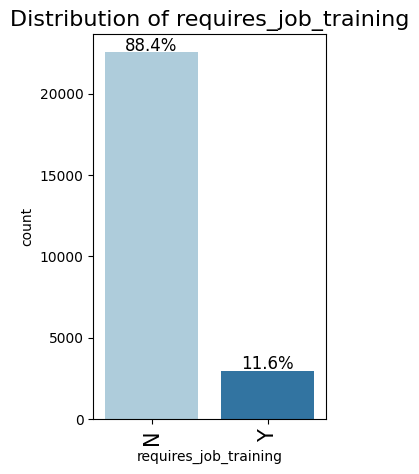

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64

--- Analyzing Column: no_of_employees ---


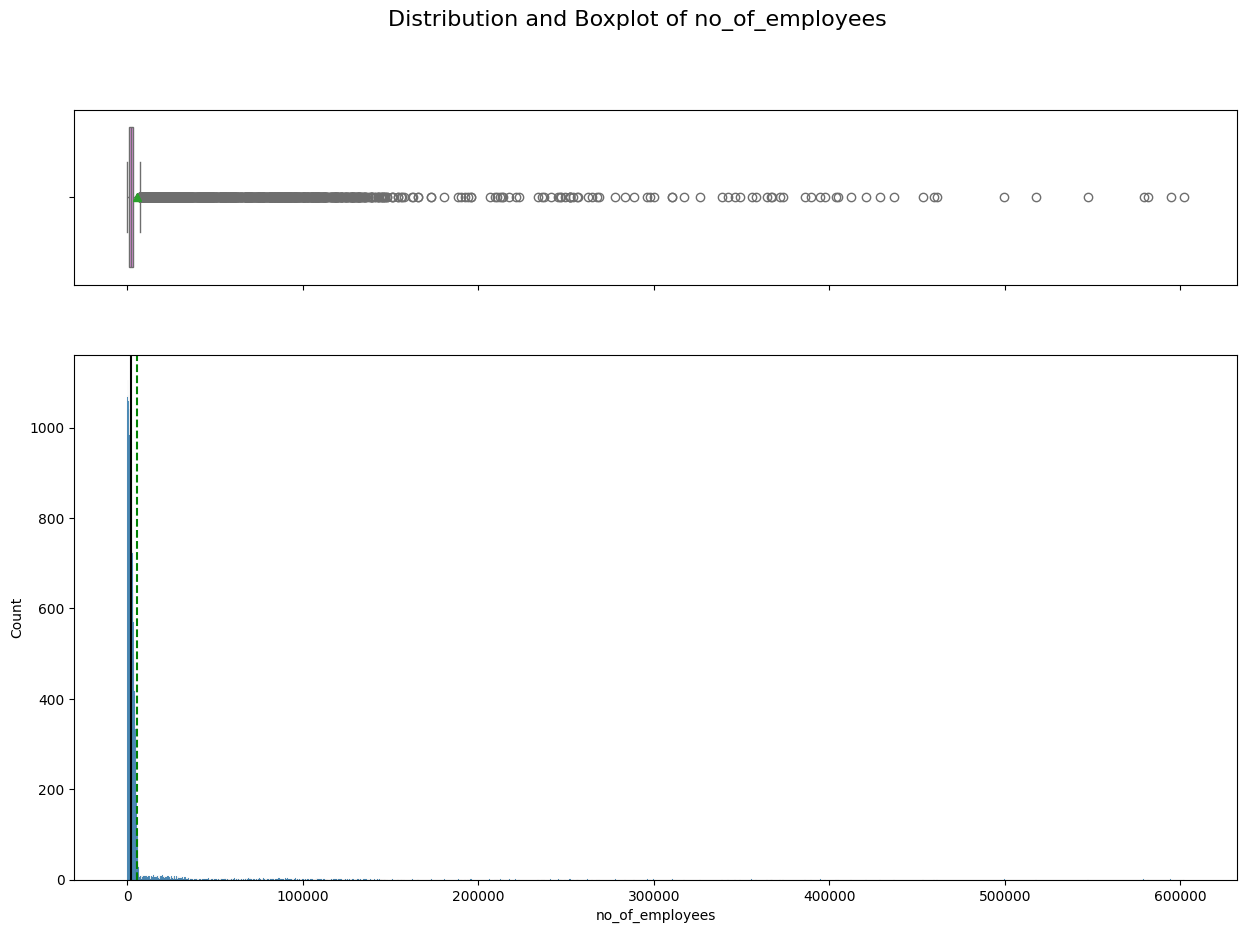

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

--- Analyzing Column: yr_of_estab ---


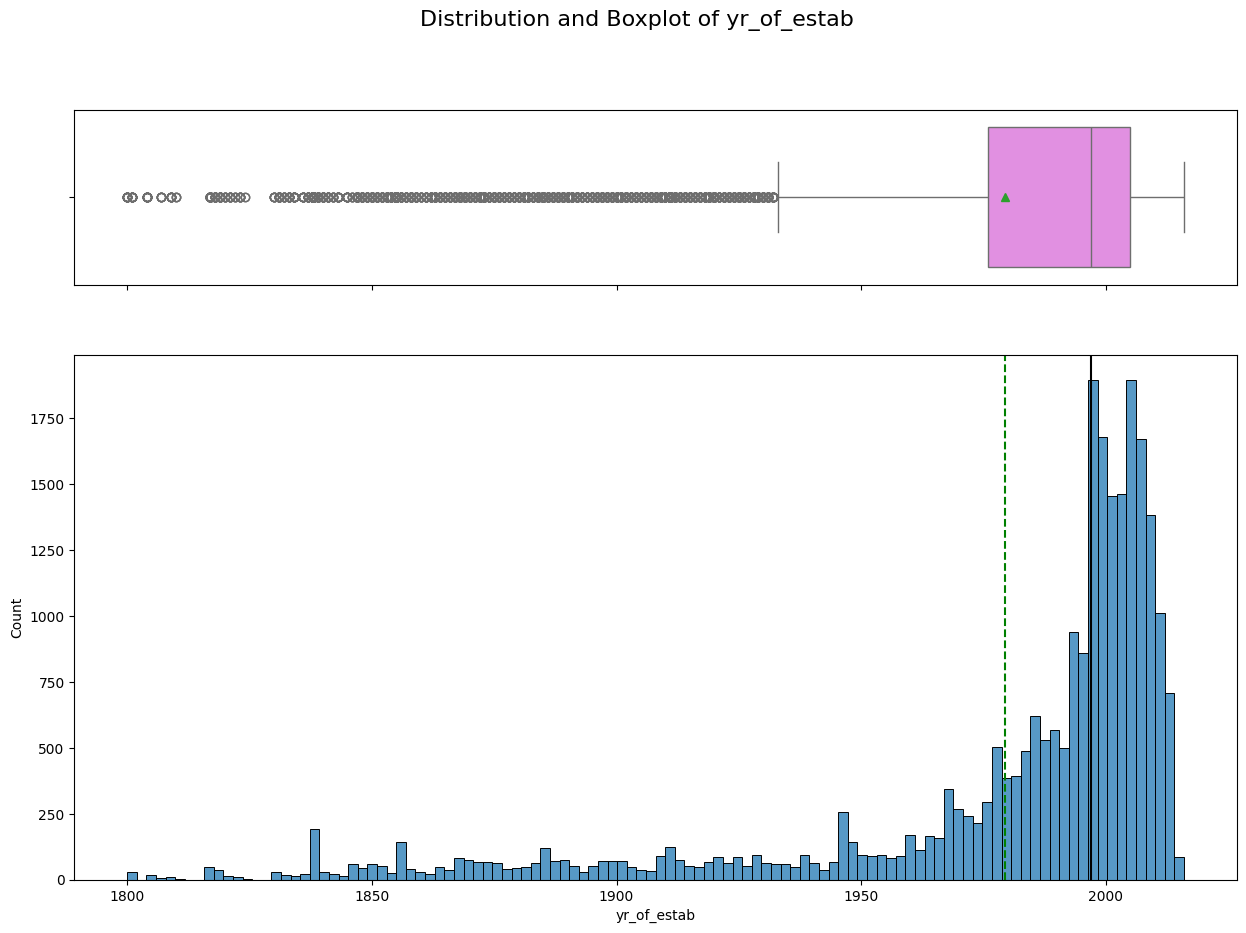

count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64

--- Analyzing Column: region_of_employment ---


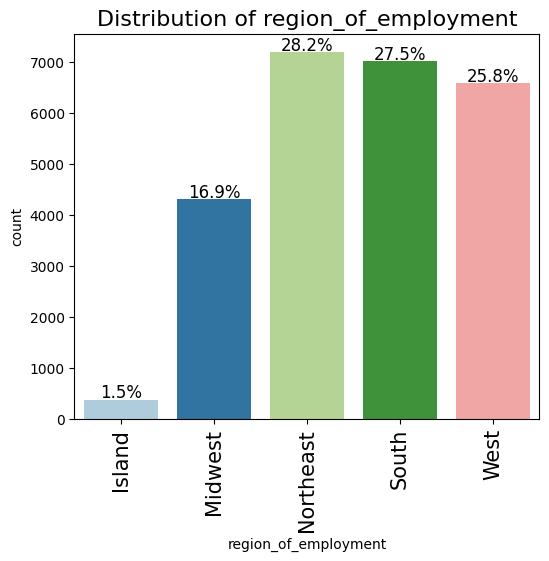

region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64

--- Analyzing Column: prevailing_wage ---


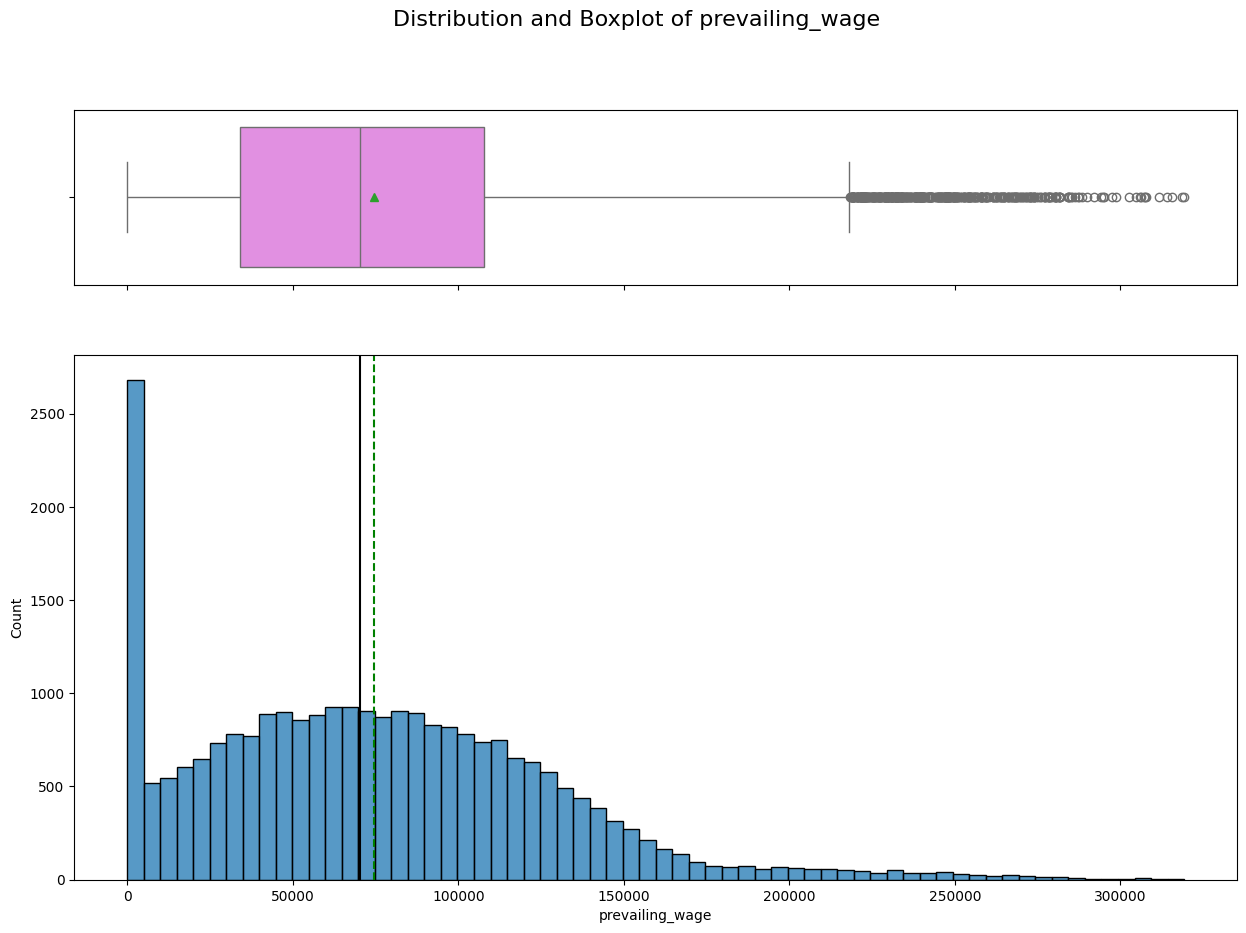

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

--- Analyzing Column: unit_of_wage ---


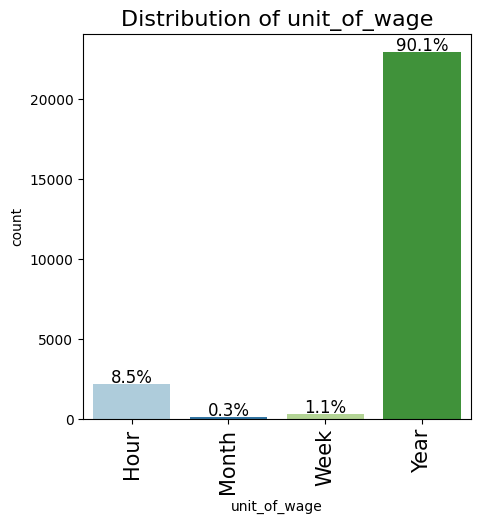

unit_of_wage
Year     90.117739
Hour      8.465463
Week      1.067504
Month     0.349294
Name: proportion, dtype: float64

--- Analyzing Column: full_time_position ---


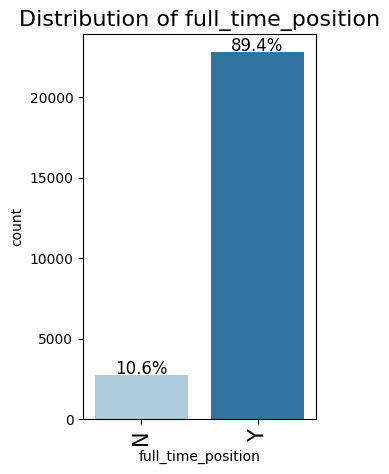

full_time_position
Y    89.375981
N    10.624019
Name: proportion, dtype: float64

--- Analyzing Column: case_status ---


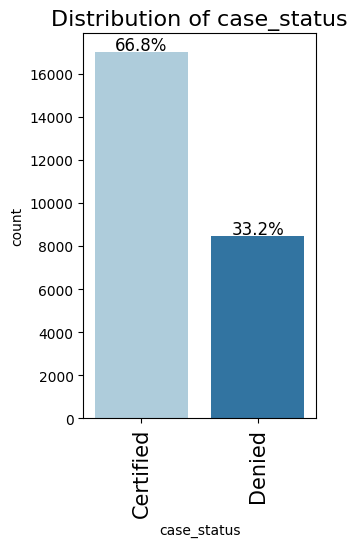

case_status
Certified    66.789639
Denied       33.210361
Name: proportion, dtype: float64


In [20]:
# Print the shape of the DataFrame.
df.shape
# Run the automated univariate analysis function on the DataFrame.
automated_univariate_analysis(df)

# Based on the analysis above we can make the following observations on each variable as seen below:

#### Observations on education of employee

**Education of Employee**
- *Dominant Groups*: There is a very high concentration of highly educated candidates. Over 77% of the applicants hold either a Bachelor's (40.2%) or a Master's (37.8%) degree.

- *Low Doctorate Representation*: Only about 8.6% have a Doctorate.

- *Implication*: Since the vast majority have at least a Bachelor's, the model might find that "Education" is a strong baseline requirement, but it may not be the primary "differentiator" for success unless comparing Doctorate vs. High School.

#### Observations on region of employment

**Region of Employment**

Balanced Spread:
- Employment is distributed fairly evenly across the Northeast (28.2%), South (27.5%), and West (25.8%).

The "Island" Outlier:
- The Island region represents a tiny fraction of the data (1.47%).

Implication:
- You have a very healthy representation of the three major US regions. However, with such a small sample size for "Island," the model might struggle to make accurate predictions for cases in that specific region due to lack of data.

#### Observations on job experience

**The Experienced Majority**

About 58% of applicants have previous job experience, while 42% do not.

Implication: This is a well-balanced feature. It’s a clean binary split that will likely be a significant "predictor" variable when you move to bivariate analysis (checking how experience affects case_status).

#### Observations on case status

**Case Status (Target Variable)**

Approval Rate:
- Approximately 66.8% of cases are Certified, while 33.2% are Denied.

Class Imbalance:
- While there are more "Certified" cases, a 2:1 ratio is generally considered a "mild" imbalance.

**Critical "Red Flag" Observation: no_of_employees**
Summary stats:

Min: 11

Max: 602,069

Mean vs. Median:
- The mean is 5,667 but the median (50%) is only 2,109.

Observation:
- This column is heavily right-skewed with massive outliers. Need to apply a Log Transformation to this column before feeding it into a model like a Decision Tree or Logistic Regression.

### Bivariate Analysis

In [21]:
def plot_pairplot(df, target_col=None):
    """
    Generates a pairplot for numeric columns.
    target_col: The categorical column to use for color coding (hue).
    """
    print("Generating pairplot... this may take a moment.")
    # We use a subset of the data if the dataframe is huge to save time
    sample_size = min(len(df), 1000) # Limit sample size to 1000 for performance.

    # Generate a pairplot for numerical columns, colored by the target column.
    sns.pairplot(df.sample(sample_size), hue=target_col, palette='husl', corner=True)
    plt.show() # Display the plot.

In [22]:
def plot_correlation_heatmap(df):
    # Set the figure size for the heatmap.
    plt.figure(figsize=(10, 8))
    # Calculate the correlation matrix for all numerical columns.
    corr = df.select_dtypes(include=[np.number]).corr()

    # Generate a mask for the upper triangle (to avoid duplicate information in the heatmap).
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Create a heatmap of the correlation matrix.
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title("Numerical Correlation Heatmap") # Set the title of the heatmap.
    plt.show() # Display the plot.

In [23]:
# Check for cardinality and whitespace issues in object (categorical) columns.
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values") # Print the number of unique values.
    # Check if there are hidden spaces in the first element of the column (as a sample).
    if df[col].dtype == 'object':
        example = df[col].iloc[0]
        if str(example) != str(example).strip():
            print(f"!!! WARNING: Whitespace detected in {col}")

continent: 6 unique values
education_of_employee: 4 unique values
has_job_experience: 2 unique values
requires_job_training: 2 unique values
region_of_employment: 5 unique values
unit_of_wage: 4 unique values
full_time_position: 2 unique values
case_status: 2 unique values


Generating pairplot... this may take a moment.


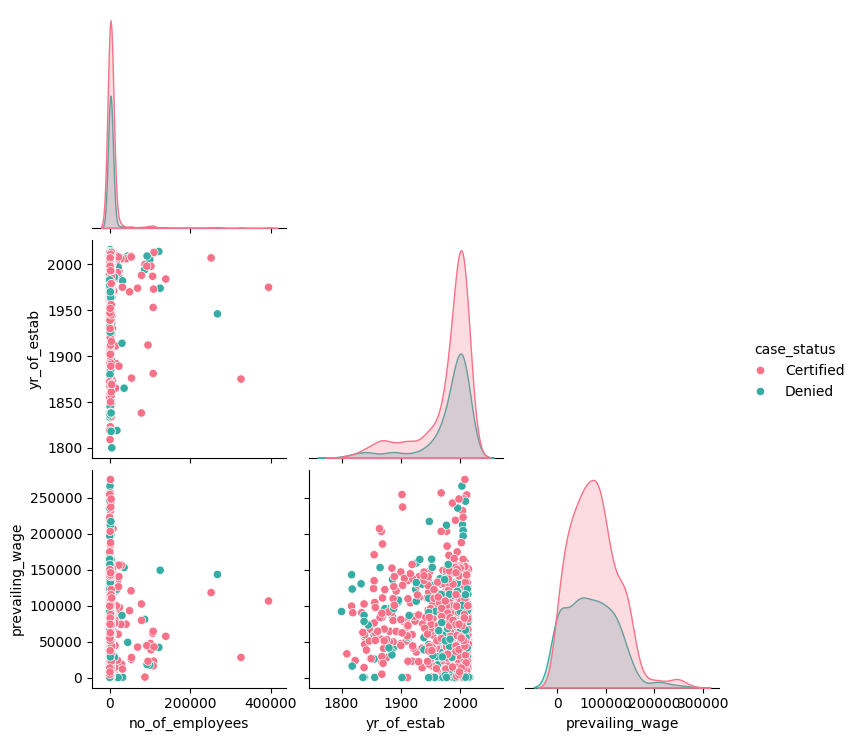

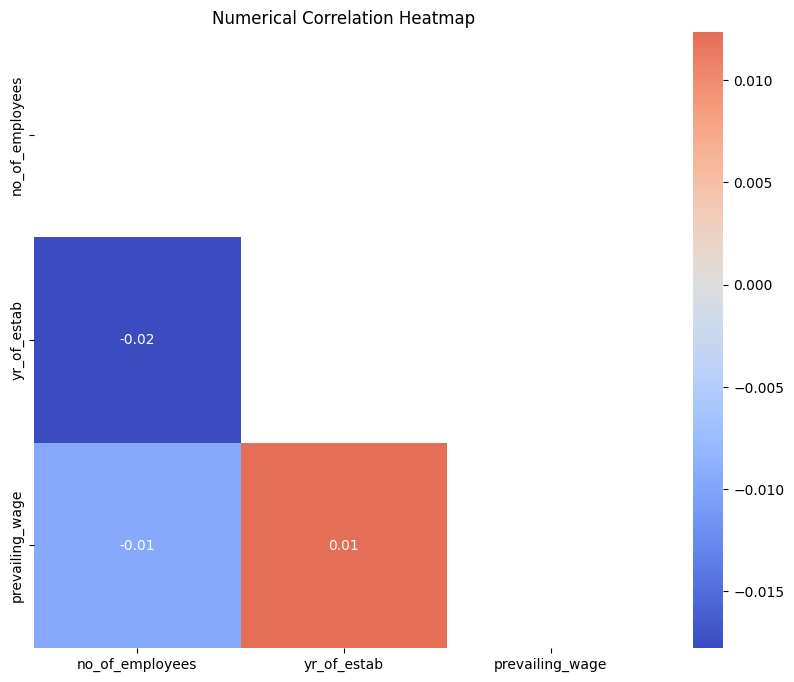

In [24]:
# Generate a pairplot to visualize relationships between numerical features, colored by 'case_status'.
plot_pairplot(df, target_col='case_status')
# Generate a heatmap to visualize correlations between numerical features.
plot_correlation_heatmap(df)

**Creating functions for further analysis.**

In [25]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10)) # Create a 2x2 grid of subplots.

    target_uniq = data[target].unique() # Get unique values of the target variable.

    # Plot histogram for the first unique target value.
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    # Plot histogram for the second unique target value.
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    # Plot boxplot comparing the predictor against the target.
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    # Plot boxplot without outliers for a clearer view of central tendencies.
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout() # Adjust layout to prevent overlapping elements.
    plt.show() # Display the plot.

In [26]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique() # Get the number of unique categories in the predictor.
    sorter = data[target].value_counts().index[-1] # Determine sorting order based on target.
    # Create a crosstabulation table showing counts of predictor vs. target.
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    # Create a crosstabulation table showing normalized percentages.
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    # Plot a stacked bar chart.
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show() # Display the plot.

In [27]:
# Create a copy so we don't overwrite the original labels if we still need them for plotting
df_encoded = df.copy()

# Map the target variable 'case_status' to numerical values (1 for Certified, 0 for Denied).
df_encoded['case_status'] = df_encoded['case_status'].map({'Certified': 1, 'Denied': 0})

# Optional: Encode other binary object columns to include them in the correlation matrix.
# Map 'has_job_experience' to 1 for 'Y' (Yes) and 0 for 'N' (No).
df_encoded['has_job_experience'] = df_encoded['has_job_experience'].map({'Y': 1, 'N': 0})
# Map 'requires_job_training' to 1 for 'Y' (Yes) and 0 for 'N' (No).
df_encoded['requires_job_training'] = df_encoded['requires_job_training'].map({'Y': 1, 'N': 0})
# Map 'full_time_position' to 1 for 'Y' (Yes) and 0 for 'N' (No).
df_encoded['full_time_position'] = df_encoded['full_time_position'].map({'Y': 1, 'N': 0})

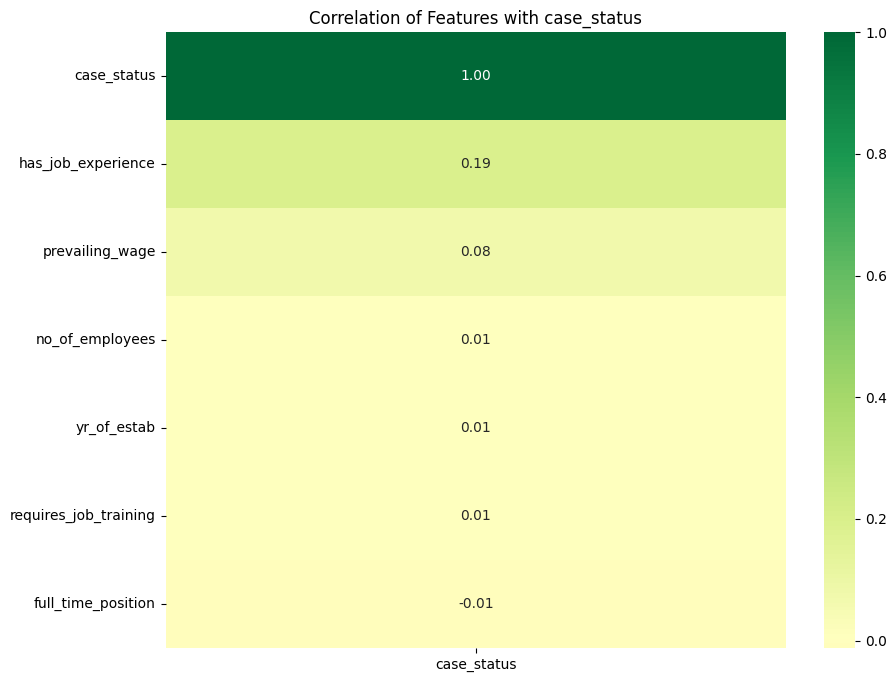

In [28]:
def plot_target_correlation(df, target_col='case_status'):
    # Set the figure size for the heatmap.
    plt.figure(figsize=(10, 8))

    # Calculate correlation for all numeric types, including newly encoded binary columns.
    corr_matrix = df.select_dtypes(include=[np.number]).corr()

    # Sort the correlations with respect to the target column in descending order.
    target_corr = corr_matrix[[target_col]].sort_values(by=target_col, ascending=False)

    # Plotting a heatmap of feature correlations with the target variable.
    sns.heatmap(target_corr, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
    plt.title(f'Correlation of Features with {target_col}') # Set the title.
    plt.show() # Display the plot.

# Run the function to visualize correlations with 'case_status' using the encoded DataFrame.
plot_target_correlation(df_encoded)

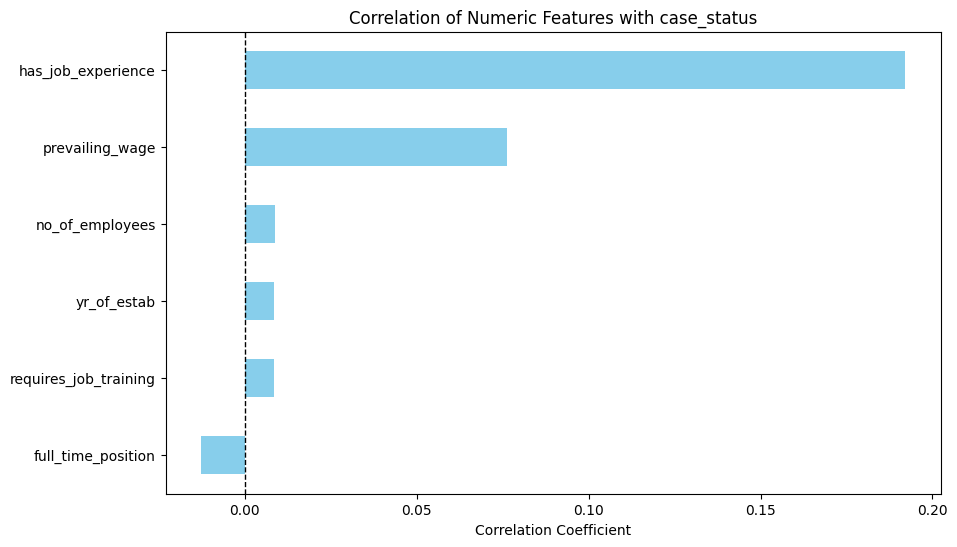

In [29]:
def plot_correlation_bar(df, target_col='case_status'):
    # Calculate correlations of all numerical features with the target column, dropping the target itself.
    correlations = df.select_dtypes(include=[np.number]).corr()[target_col].drop(target_col)
    correlations = correlations.sort_values() # Sort correlations in ascending order.

    # Create a horizontal bar plot of correlations.
    correlations.plot(kind='barh', figsize=(10, 6), color='skyblue')
    plt.title(f'Correlation of Numeric Features with {target_col}') # Set the plot title.
    plt.xlabel('Correlation Coefficient') # Set the x-axis label.
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # Add a vertical line at 0 for reference.
    plt.show() # Display the plot.

# Call the function to plot the correlation of numeric features with 'case_status'.
plot_correlation_bar(df_encoded)

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


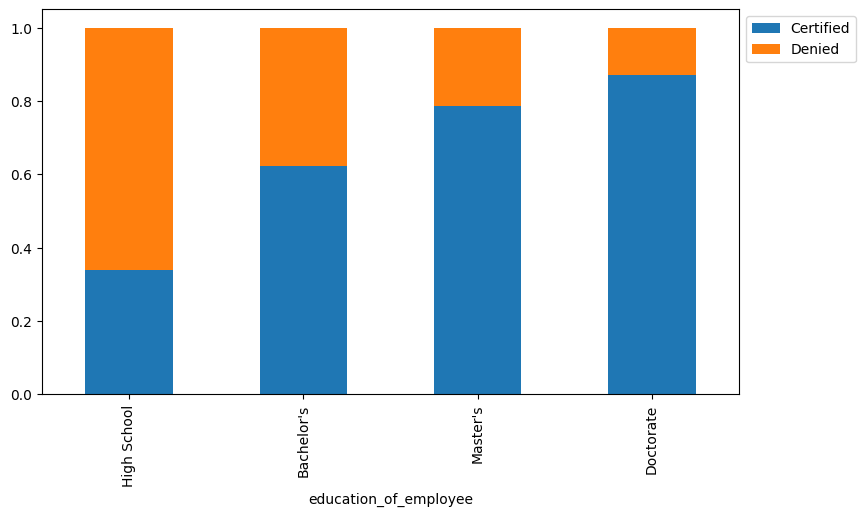

In [30]:
# Plot a stacked bar chart to visualize how 'education_of_employee' influences 'case_status'.
stacked_barplot(df, 'education_of_employee', 'case_status')

# Does Higher Education Increase the Chances of Visa Certification?

## Dataset

| Education Level | Certified | Denied | Total |
|-----------------|-----------|--------|--------|
| High School     | 1164      | 2256   | 3420   |
| Bachelor's      | 6367      | 3867   | 10234  |
| Master's        | 7575      | 2059   | 9634   |
| Doctorate       | 1912      | 280    | 2192   |
| **All**         | 17018     | 8462   | 25480  |

---

## Certification Rate Calculation

[
{Certification Rate} = {Certified}/{Total} * 100
]

### Certification Rates by Education Level

| Education Level | Certification Rate |
|-----------------|-------------------|
| High School     | 34.04% |
| Bachelor's      | 62.21% |
| Master's        | 78.63% |
| Doctorate       | 87.23% |

---

## Observed Trend

There is a clear positive relationship between education level and visa certification rate:

- **High School:** More likely to be denied than certified.
- **Bachelor's Degree:** More likely to be certified than denied.
- **Master's Degree:** Strong majority certified.
- **Doctorate:** Very high certification probability.

Certification likelihood increases consistently as education level rises.

---

## Interpretation

The relationship between education level and visa certification appears:

- **Positive**
- **Strong**
- **Monotonic (consistently increasing)**

Higher educational attainment substantially increases the probability of visa certification for well-paid jobs abroad.

## Conclusion

Based on the data provided, higher education significantly increases the chances of visa certification. Doctorate holders have the highest approval rates, while High School applicants face the greatest likelihood of denial.

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


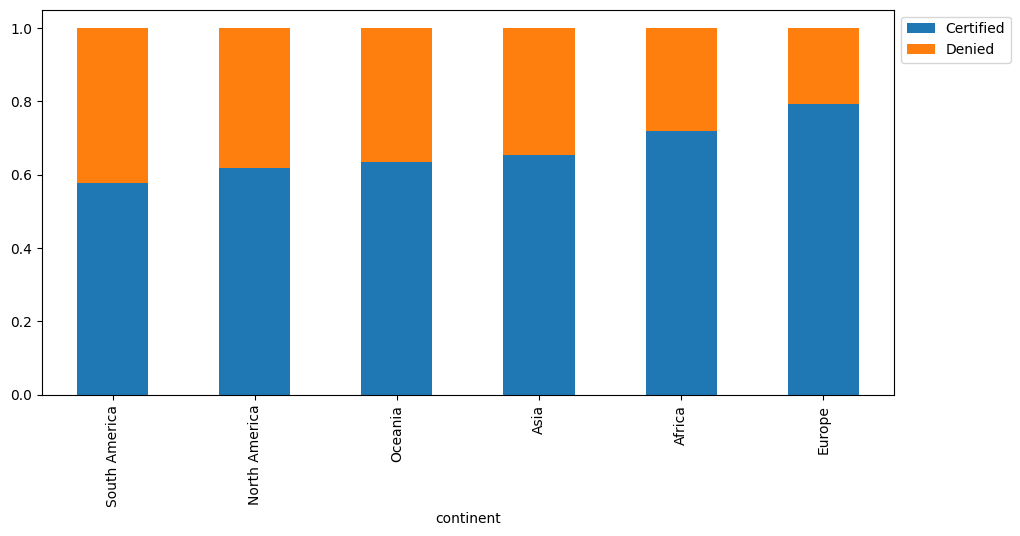

In [31]:
# Plot a stacked bar chart to visualize how 'continent' influences 'case_status'.
stacked_barplot(df, 'continent', 'case_status')

# Analysis: Visa Case Status by Continent

Visa status **does change significantly** depending on the continent. While the total number of applications is dominated by Asia, the **Certification Rate** (the percentage of "Certified" cases out of the "All" total) reveals clear disparities between regions.

### Summary Table: Certification Rates
The overall average certification rate across all continents is **66.8%**.

| Continent       | Certified | Denied | Total (All) | **Certification Rate** |
| :-------------- | :-------- | :----- | :---------- | :--------------------- |
| **Europe** | 2,957     | 775    | 3,732       | **79.23%** |
| **Africa** | 397       | 154    | 551         | **72.05%** |
| **Asia** | 11,012    | 5,849  | 16,861      | **65.31%** |
| **Oceania** | 122       | 70     | 192         | **63.54%** |
| **North America**| 2,037     | 1,255  | 3,292       | **61.88%** |
| **South America**| 493       | 359    | 852         | **57.86%** |
| **Total (All)** | **17,018**| **8462**| **25,480** | **66.79%** |

---

### Key Findings

* **Top Performer:** **Europe** has the highest success rate at approximately **79%**, significantly outperforming the global average.
* **Lowest Success Rate:** **South America** has the lowest certification rate at **58%**, followed closely by **North America** at **62%**.
* **Volume vs. Rate:** Even though **Asia** accounts for the vast majority of cases (66% of all applications), its certification rate (**65%**) is actually slightly below the global average.

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


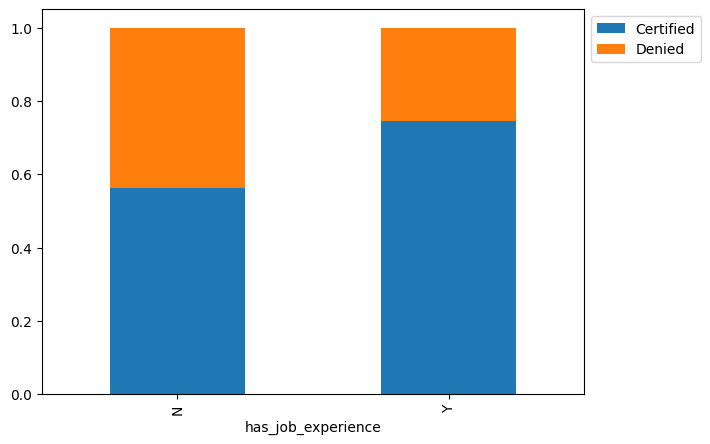

In [32]:
# Plot a stacked bar chart to visualize how 'has_job_experience' influences 'case_status'.
stacked_barplot(df, 'has_job_experience', 'case_status')

# Analysis: Visa Case Status by Job Experience

**Job experience is a critical factor** in determining the success of a visa application. There is a stark contrast in certification rates between those who have experience and those who do not.

### Summary Table: Experience vs. Certification
The overall dataset average certification rate is **66.79%**.

| Has Job Experience | Certified | Denied | Total (All) | **Certification Rate** |
| :----------------- | :-------- | :----- | :---------- | :--------------------- |
| **Yes (Y)** | 11,024    | 3,778  | 14,802      | **74.48%** |
| **No (N)** | 5,994     | 4,684  | 10,678      | **56.13%** |
| **Total (All)** | **17,018**| **8,462**| **25,480** | **66.79%** |

---

### Key Findings

* **The Experience Advantage:** Applicants with prior job experience have a certification rate that is **7.7% higher** than the population average and **18.35% higher** than those without experience.
* **Risk Factor:** Applicants without experience (**N**) have an almost 1:1 ratio of being certified vs. denied (56% vs 44%). In comparison, experienced applicants (**Y**) are certified at a ratio of nearly 3:1.
* **Impact on Modeling:** Because the difference in outcomes is so large (an 18.35% gap), `has_job_experience` is likely to be one of the top features in any predictive model (like Random Forest or XGBoost) trained on this data.

#### Is the prevailing wage consistent across all regions of the US?

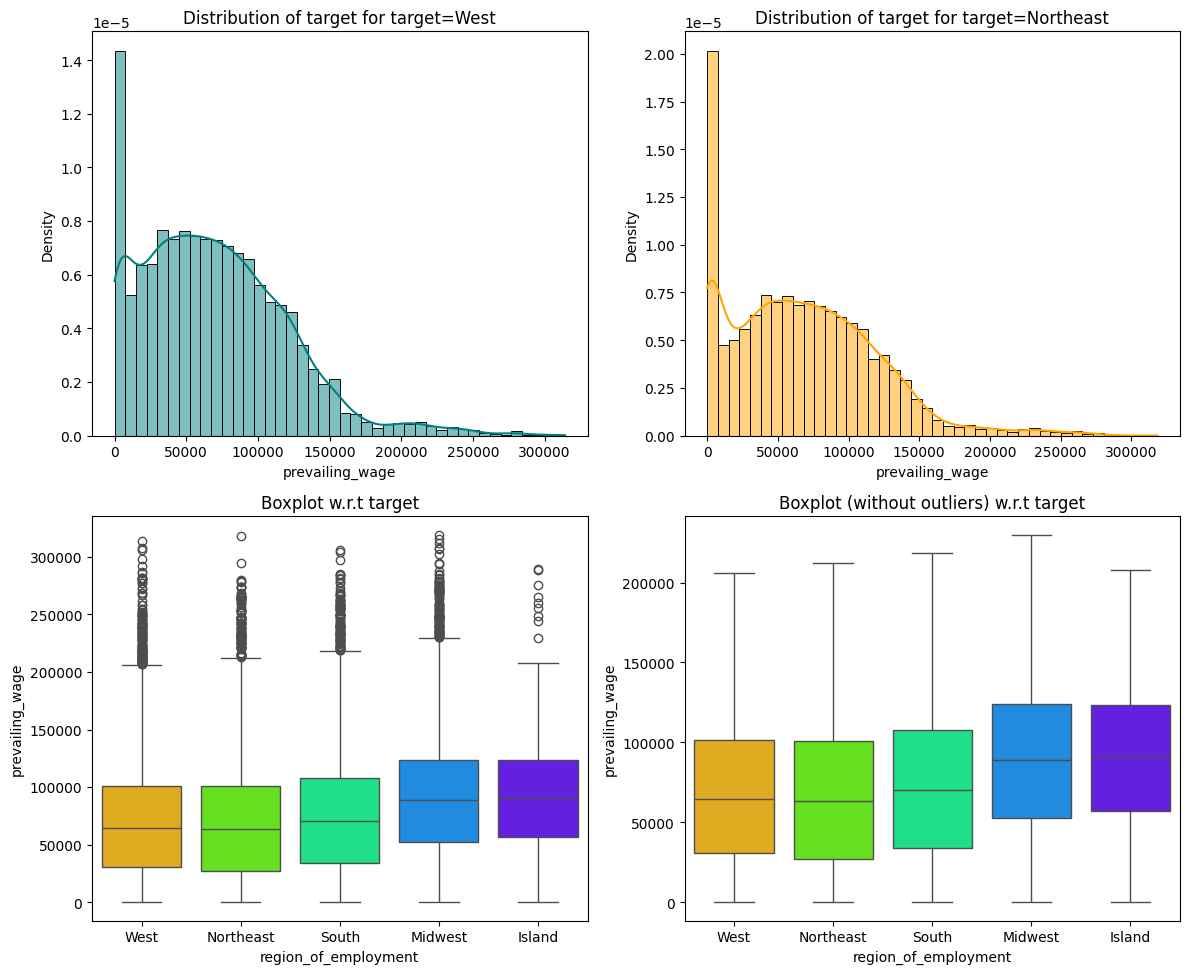

In [33]:
# Plot the distribution of 'prevailing_wage' across different 'region_of_employment'.
distribution_plot_wrt_target(df, 'prevailing_wage', 'region_of_employment')

### Analysis of Prevailing Wage Distribution by Region

The visualization confirms that **prevailing wage distributions vary significantly across regions of employment**. While the wage profiles for the **West** and **Northeast** are largely comparable, distinct shifts occur in other territories:

* **Regional Divergence:** The **South** exhibits a unique distribution profile, characterized by a different median wage and spread compared to the coastal regions.
* **Similarity in the Interior and Territories:** The **Midwest** and **Island** regions share similar distributional characteristics. This alignment becomes particularly evident when excluding outliers, revealing a consistent core wage structure across these two areas.
* **Outlier Impact:** The presence of high-wage outliers in specific regions suggests that while the "typical" wage may be lower (such as in the Midwest), there remains a subset of high-value positions that deviate from the regional norm.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

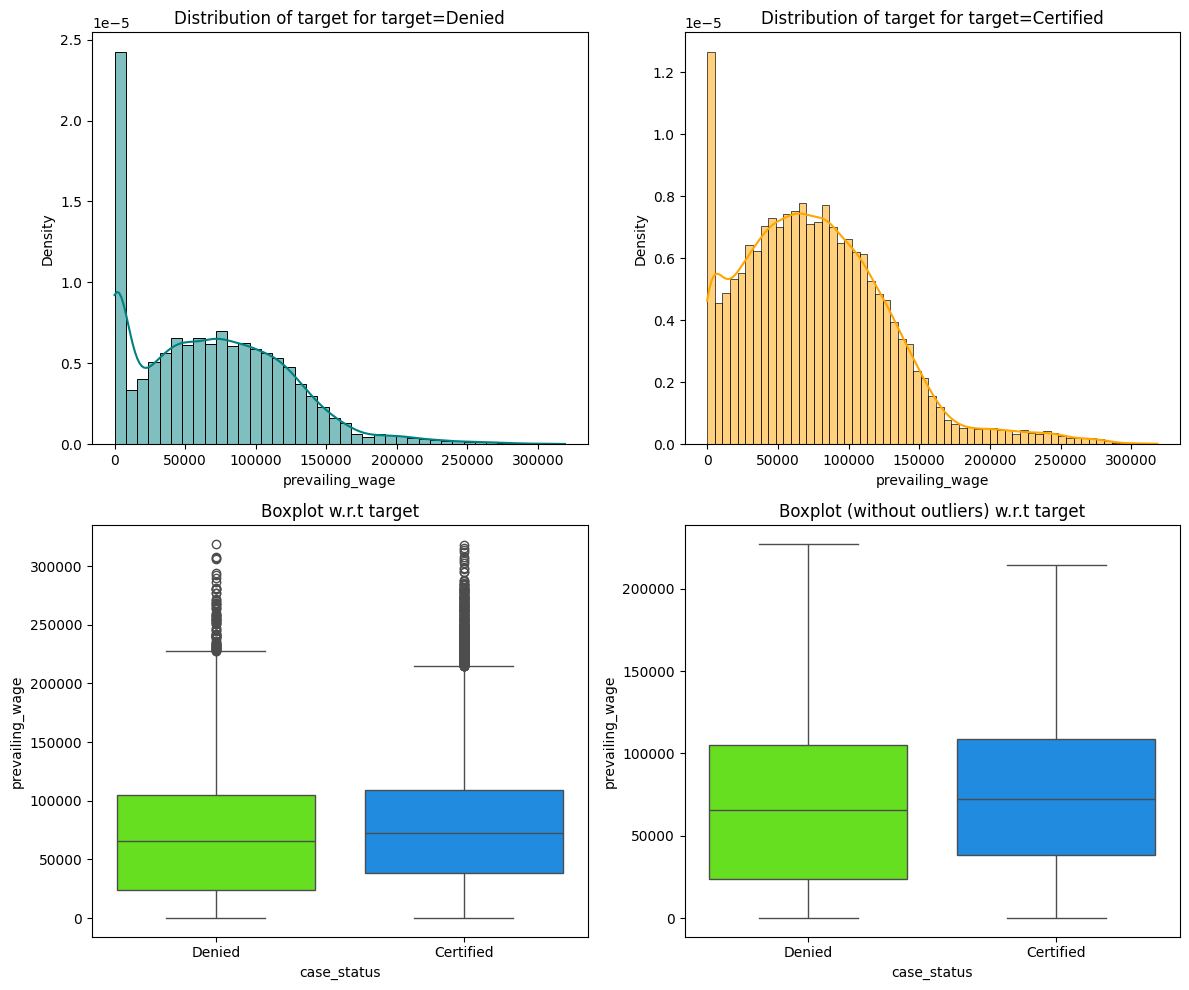

In [34]:
# Plot the distribution of 'prevailing_wage' for each 'case_status'.
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

# Relationship Between Prevailing Wage and Visa Certification Status


To examine whether visa certification status varies with changes in the prevailing wage set to protect both local talent and foreign workers.

---

## Visual Analysis

### 1. Distribution Comparison

The distribution plots of prevailing wage by case status (Certified vs. Denied) show:

- Both distributions are right-skewed.
- The Certified distribution is shifted to the right relative to the Denied distribution.
- Denied cases show greater density in lower wage ranges.
- Certified cases are more concentrated in mid-to-high wage ranges.

This suggests that higher prevailing wages are associated with a higher likelihood of certification.

---

### 2. Boxplot Analysis

#### With Outliers
- The median prevailing wage for Certified cases is higher than for Denied cases.
- Certified cases show a wider upper range with more high-wage outliers.

#### Without Outliers
- The median difference remains.
- The interquartile range (IQR) for Certified cases is positioned higher than for Denied cases.
- The relationship persists even after removing extreme values.

This indicates that the association is not driven solely by outliers.

---

## Interpretation

There is a clear positive relationship between prevailing wage and visa certification:

- Lower prevailing wages → Higher likelihood of denial.
- Higher prevailing wages → Higher likelihood of certification.

This pattern aligns with regulatory intent. Prevailing wage requirements are designed to:

- Protect domestic labor markets.
- Prevent wage suppression.
- Ensure foreign workers are compensated competitively.

Applications offering higher wages are more likely to meet compliance and scrutiny standards.

---

## Important Considerations

While the visual evidence suggests a strong association, this does not prove causation. Other variables may influence certification decisions, such as:

- Education level
- Job occupation
- Employer history
- Work experience
- Industry type

Further statistical testing (e.g., t-test, Mann–Whitney U test, or logistic regression) would be required to confirm statistical significance and control for confounding factors.

---

## Conclusion

Yes, visa certification status varies with prevailing wage.

Higher prevailing wages are consistently associated with a greater probability of certification. This relationship remains evident even after accounting for extreme wage values, suggesting a meaningful and robust association.

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


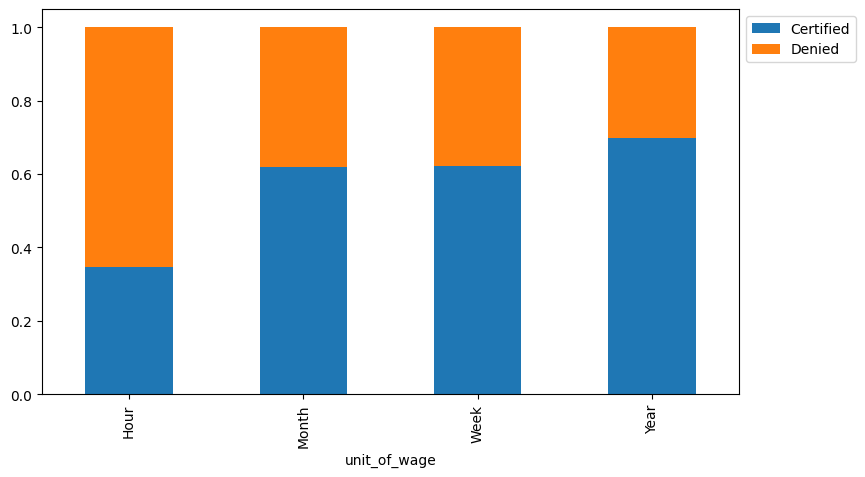

In [35]:
# Plot a stacked bar chart to visualize how 'unit_of_wage' influences 'case_status'.
stacked_barplot(df, 'unit_of_wage', 'case_status')

In [36]:
# This creates a separate column for every continent (continent_Asia, continent_Europe, etc.)
df_final = pd.get_dummies(df_encoded, columns=['continent', 'education_of_employee', 'region_of_employment'])

# Impact of Prevailing Wage Unit on Visa Certification

To determine whether the unit of prevailing wage (e.g., Hourly, Weekly, Monthly, Yearly) influences the likelihood of visa certification.

---

## Correlation Analysis

From the feature correlation matrix:

- The correlation between `prevailing_wage` and `case_status` is **0.08**.
- Other related employment variables show very weak correlations (near 0).
- Stronger correlation is observed with `has_job_experience` (0.19), but still moderate.

A correlation value of **0.08** indicates a very weak positive relationship.

---

## Interpretation

If wage unit had a meaningful impact, we would expect:

- Noticeable correlation values
- Clear separation in distribution by case status
- Stronger predictive influence in modeling

However:

- The correlation is close to zero.
- This suggests wage unit type (Hourly vs Weekly vs Annual) does not meaningfully influence certification decisions.
- Certification decisions are more likely driven by actual wage level rather than the reporting unit.

This makes practical sense because:
- Wage units are typically standardized or converted during evaluation.
- Regulatory decisions focus on whether the wage meets prevailing wage requirements — not how it is expressed.

---

## Conclusion

There is no strong evidence that the unit of prevailing wage significantly impacts visa certification likelihood.

The actual wage amount appears to be more relevant than whether it is expressed hourly, weekly, monthly, or annually.

## Data Pre-processing

### Negative values were handled during EDA

## Missing Value

In [37]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter to show only columns with missing values, if any
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("No missing values found in any column.")
else:
    print("Missing values per column:")
    print(missing_values)

No missing values found in any column.


**No Missing values found**

### Outlier Check

In [38]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Create a figure with two subplots, sharing the x-axis.
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    # Set a super title for the entire figure.
    f2.suptitle(f'Distribution and Boxplot of {feature}', fontsize=16)
    # Create a boxplot in the first subplot (ax_box2) to visualize central tendency and outliers.
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    # Create a histogram in the second subplot (ax_hist2) to visualize distribution.
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    # Add a vertical line for the mean of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    # Add a vertical line for the median of the feature to the histogram.
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show() # Display the plot

In [39]:
def iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print("\n")

In [40]:
def zscore_outliers(df, column, threshold=3):
    # Calculate the absolute Z-score for the column
    z_scores = np.abs(zscore(df[column]))

    # Identify outliers where the absolute Z-score is greater than the threshold
    outliers = df[z_scores > threshold]

    print(f"Column: {column}")
    print(f"  Number of outliers: {len(outliers)}")
    print(f"  Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"  Z-score threshold: {threshold}")
    print("\n")

Numerical columns identified for outlier detection: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
--- Analyzing Column: no_of_employees ---
count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64


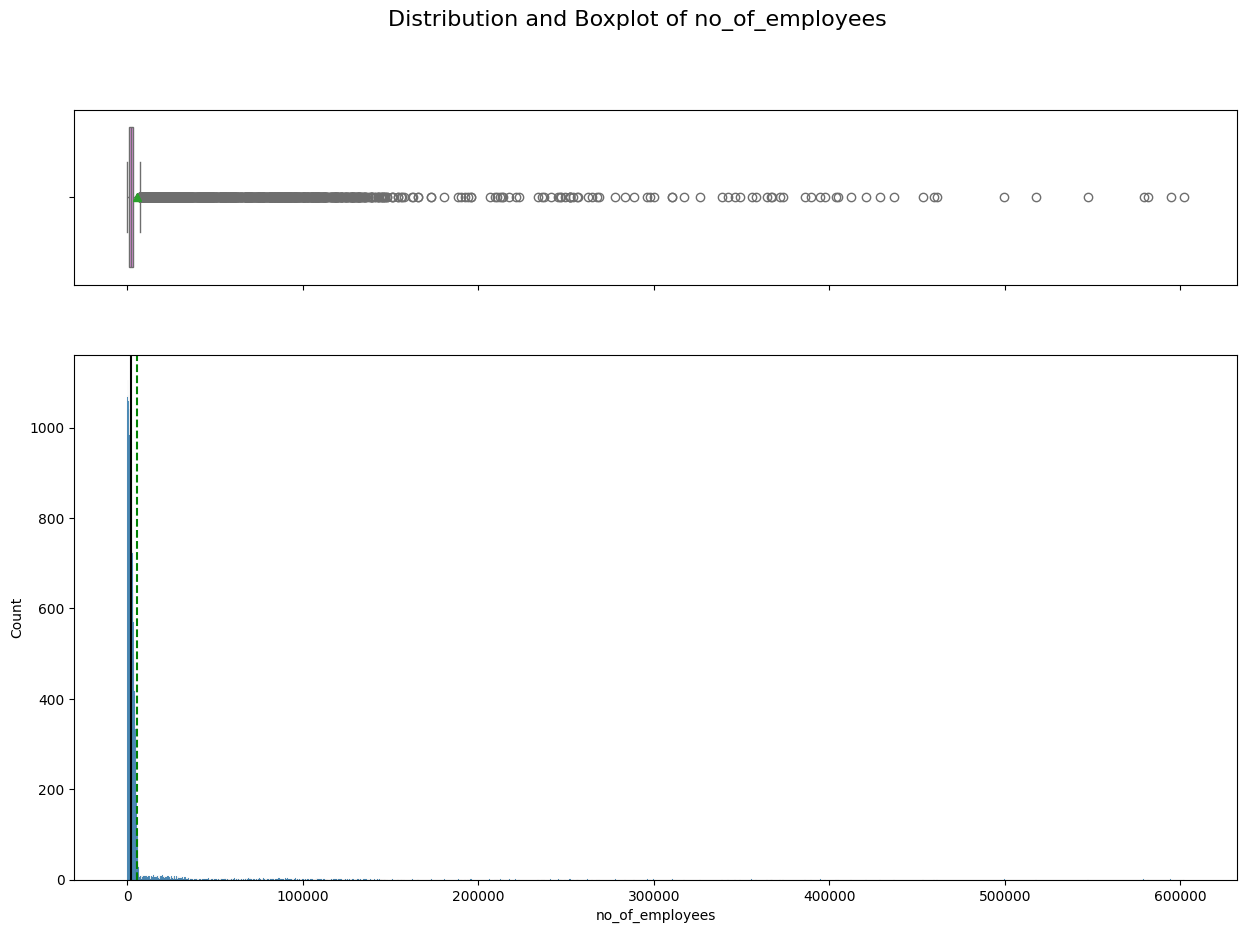

Column: no_of_employees
  Number of outliers: 1556
  Percentage of outliers: 6.11%
  Lower Bound: -2701.00, Upper Bound: 7227.00


Column: no_of_employees
  Number of outliers: 429
  Percentage of outliers: 1.68%
  Z-score threshold: 3


--- Analyzing Column: yr_of_estab ---
count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64


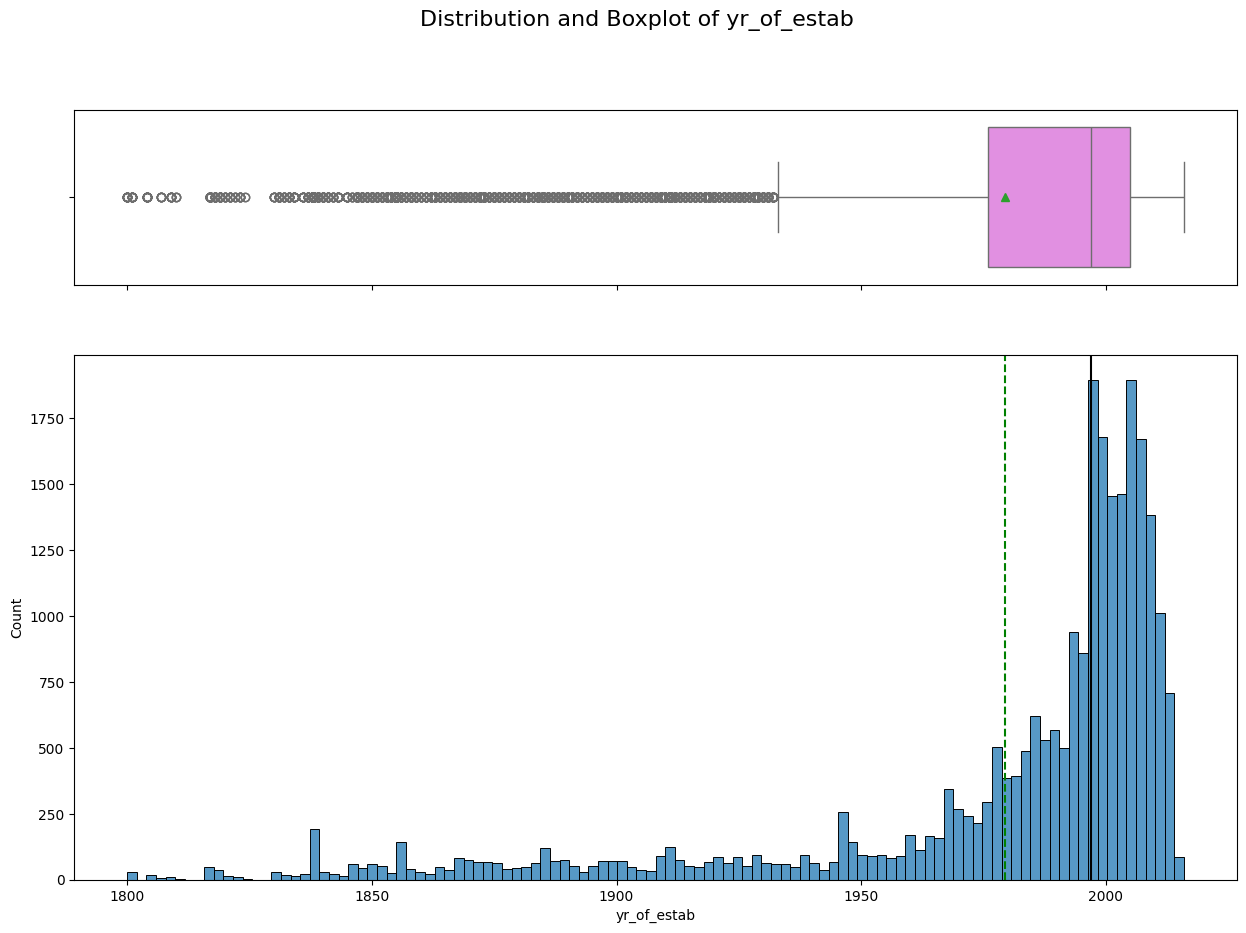

Column: yr_of_estab
  Number of outliers: 3260
  Percentage of outliers: 12.79%
  Lower Bound: 1932.50, Upper Bound: 2048.50


Column: yr_of_estab
  Number of outliers: 695
  Percentage of outliers: 2.73%
  Z-score threshold: 3


--- Analyzing Column: prevailing_wage ---
count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64


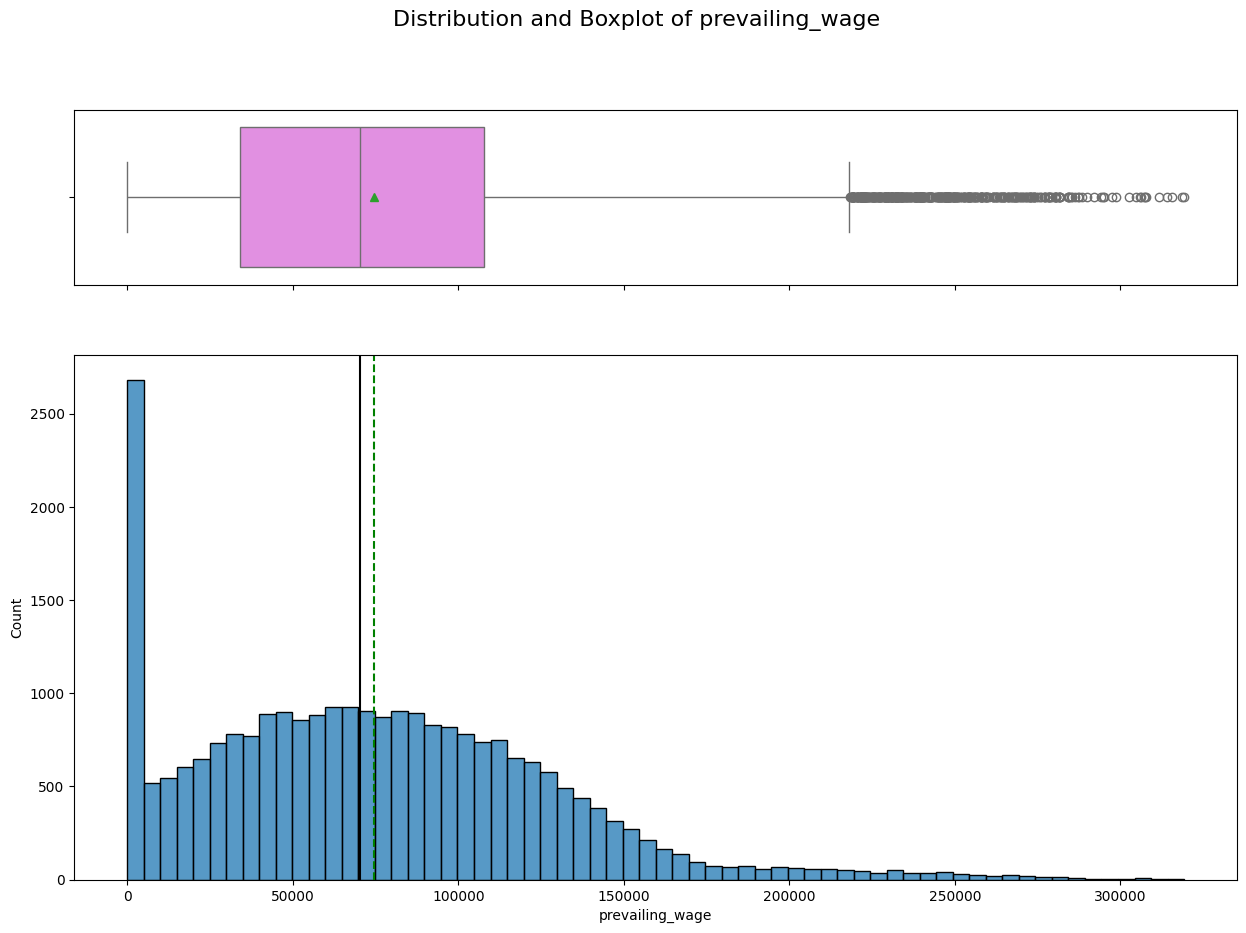

Column: prevailing_wage
  Number of outliers: 427
  Percentage of outliers: 1.68%
  Lower Bound: -76564.57, Upper Bound: 218315.56


Column: prevailing_wage
  Number of outliers: 294
  Percentage of outliers: 1.15%
  Z-score threshold: 3




In [41]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns identified for outlier detection: {numerical_cols}")
for col in numerical_cols:
    print(f"--- Analyzing Column: {col} ---")
    print(df[col].describe())
    histogram_boxplot(df, col)
    iqr_outliers(df, col)
    zscore_outliers(df, col)

### Outlier Handling

In [42]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns identified for outlier detection: {numerical_cols}")

Numerical columns identified for outlier detection: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [43]:
print(df.describe())
print(df.info())

       no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.089207   1979.409929     74455.814592
std       22877.917453     42.366929     52815.942327
min          11.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-nul

## Summary:

The analysis successfully identified and characterized outliers for each numerical column using the three specified methods. Boxplots provided a visual confirmation of skewed distributions and extreme values. The IQR rule identified a broader set of outliers, particularly in `yr_of_estab` due to its fixed lower bound. The Z-score method, being more sensitive to the distribution's mean and standard deviation, consistently identified a smaller, more extreme subset of outliers across all columns. The findings indicate that all three columns exhibit outliers, with `no_of_employees` and `prevailing_wage` showing significant high-side outliers, and `yr_of_estab` displaying low-side outliers corresponding to older establishments.

### Data Analysis Key Findings
*   **`no_of_employees`**:
    *   Boxplot analysis revealed significant high-side outliers, with a maximum value of 602,069 employees compared to a 75th percentile of 3,504, indicating a highly right-skewed distribution.
    *   The IQR method identified 1,556 outliers (6.11% of the data), all above the upper bound of 7,227.00.
    *   The Z-score method (threshold=3) detected 429 outliers (1.68% of the data), a substantially smaller number than the IQR method.
*   **`yr_of_estab`**:
    *   Boxplot visualization showed low-side outliers, with establishments dating back to 1800, significantly older than the 25th percentile of 1976.
    *   The IQR method found 3,260 outliers (12.79% of the data), primarily representing companies established before the lower bound of 1932.50.
    *   The Z-score method (threshold=3) identified 695 outliers (2.73% of the data), fewer than the IQR method.
*   **`prevailing_wage`**:
    *   Boxplot analysis indicated outliers on both ends, more pronounced on the higher side. The maximum wage was \$319,210.27, well above the 75th percentile of \$107,735.51, suggesting a right-skewed distribution.
    *   The IQR method identified 427 outliers (1.68% of the data), mostly above the upper bound of \$218,315.56.
    *   The Z-score method (threshold=3) detected 294 outliers (1.15% of the data), a more conservative count compared to the IQR method.
*   **Method Comparison**: The Z-score method consistently identified fewer outliers than the IQR method across all numerical columns, suggesting it is a more conservative approach in this dataset, particularly given the skewed distributions.


**Decided not to apply log and scaling since they work better for regression problems than for classification issues, which is the case here.**



# Data Preparation for modeling

## Feature Engineering

## Finalize Categorical Encoding
Ensure all remaining nominal categorical features are one-hot encoded and verify any ordinal features are correctly mapped.


Identify all categorical columns that still need to be encoded in the `df_final` DataFrame. Based on the previous steps and the prompt, `unit_of_wage` is the primary remaining nominal categorical feature. Use `pd.get_dummies` to one-hot encode this column, adding the new columns to `df_final` and dropping the original `unit_of_wage` column.



### Adding a column to change year established to established_for_yrs

In [44]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate established_for_years
df_final['established_for_years'] = current_year - df_final['yr_of_estab']

df.drop(columns=['yr_of_estab'], inplace=True)# Display the head of df_final to show the new column
print("First 5 rows of df_final with new 'established_for_years' column:")
display(df_final.head())

First 5 rows of df_final with new 'established_for_years' column:


,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,established_for_years
0,0,0,14513,2007,592.2029,Hour,1,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,19
1,1,0,2412,2002,83425.6500,Year,1,1,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,24
2,0,1,44444,2008,122996.8600,Year,1,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,18
3,0,0,98,1897,83434.0300,Year,1,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,129
4,1,0,1082,2005,149907.3900,Year,1,1,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,21


In [45]:
# Identify remaining categorical columns in df_final
# The prompt mentions unit_of_wage is likely the only one, but let's confirm programmatically
remaining_categorical_cols = df_final.select_dtypes(include='object').columns.tolist()
print(f"Remaining categorical columns to encode: {remaining_categorical_cols}")

# Apply one-hot encoding to remaining categorical columns
df_final = pd.get_dummies(df_final, columns=remaining_categorical_cols, drop_first=True)

# Display the first few rows of the updated df_final DataFrame
print("\nFirst 5 rows of df_final after encoding:")
print(df_final.head())

# Display its information to confirm the encoding
print("\nDataFrame info after encoding:")
df_final.info()

Remaining categorical columns to encode: ['unit_of_wage']

First 5 rows of df_final after encoding:
   has_job_experience  requires_job_training  no_of_employees  yr_of_estab  \
0                   0                      0            14513         2007   
1                   1                      0             2412         2002   
2                   0                      1            44444         2008   
3                   0                      0               98         1897   
4                   1                      0             1082         2005   

   prevailing_wage  full_time_position  case_status  continent_Africa  \
0         592.2029                   1            0             False   
1       83425.6500                   1            1             False   
2      122996.8600                   1            0             False   
3       83434.0300                   1            0             False   
4      149907.3900                   1            1              T

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

## Final Look at the data set before setting out to model

In [46]:
df_final.describe()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,established_for_years
count,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000
mean,0.580926,0.115973,5667.089207,1979.409929,74455.814592,0.893760,0.667896,46.590071
std,0.493417,0.320199,22877.917453,42.366929,52815.942327,0.308151,0.470977,42.366929
min,0.000000,0.000000,11.000000,1800.000000,2.136700,0.000000,0.000000,10.000000
25%,0.000000,0.000000,1022.000000,1976.000000,34015.480000,1.000000,0.000000,21.000000
50%,1.000000,0.000000,2109.000000,1997.000000,70308.210000,1.000000,1.000000,29.000000
75%,1.000000,0.000000,3504.000000,2005.000000,107735.512500,1.000000,1.000000,50.000000
max,1.000000,1.000000,602069.000000,2016.000000,319210.270000,1.000000,1.000000,226.000000


In [47]:
data = df_final.copy()

In [48]:
data.describe()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,established_for_years
count,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000
mean,0.580926,0.115973,5667.089207,1979.409929,74455.814592,0.893760,0.667896,46.590071
std,0.493417,0.320199,22877.917453,42.366929,52815.942327,0.308151,0.470977,42.366929
min,0.000000,0.000000,11.000000,1800.000000,2.136700,0.000000,0.000000,10.000000
25%,0.000000,0.000000,1022.000000,1976.000000,34015.480000,1.000000,0.000000,21.000000
50%,1.000000,0.000000,2109.000000,1997.000000,70308.210000,1.000000,1.000000,29.000000
75%,1.000000,0.000000,3504.000000,2005.000000,107735.512500,1.000000,1.000000,50.000000
max,1.000000,1.000000,602069.000000,2016.000000,319210.270000,1.000000,1.000000,226.000000


In [49]:
# Separate features (X) and target variable (y) from the data DataFrame
X = data.drop(['case_status'], axis=1)
y = data["case_status"]

# The X DataFrame should already be fully numerical after previous encoding steps
# X = pd.get_dummies(X, drop_first=True) # This line is redundant if X is already fully numerical

# Split data into training (70%) and a temporary set (30%) for further splitting
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y
)

# Split the temporary set (30%) into validation (15% of total) and test (15% of total) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp
)

In [50]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (15288, 25)
Shape of Validation set :  (5096, 25)
Shape of test set :  (5096, 25)
Percentage of classes in training set:
case_status
1    0.667909
0    0.332091
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.667779
0    0.332221
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [51]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [52]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [53]:
scorer = metrics.make_scorer(metrics.f1_score)

In [54]:
# Store all results
all_results = []
all_names = []

### Model building with Original data

In [55]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Complete the code to set the number of splits.
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train) ## Complete the code to fit the model on original training data

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is f1 score

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7749999682799622
Random forest: 0.8017557485557211
GBM: 0.8243043176674204
Adaboost: 0.8190448921439575
Xgboost: 0.808881488413786
dtree: 0.7369762101090912

Validation Performance:

Bagging: 0.7695254936634247
Random forest: 0.8015873015873016
GBM: 0.8239834596829773
Adaboost: 0.8192771084337349
Xgboost: 0.8120824053452116
dtree: 0.7489626556016598


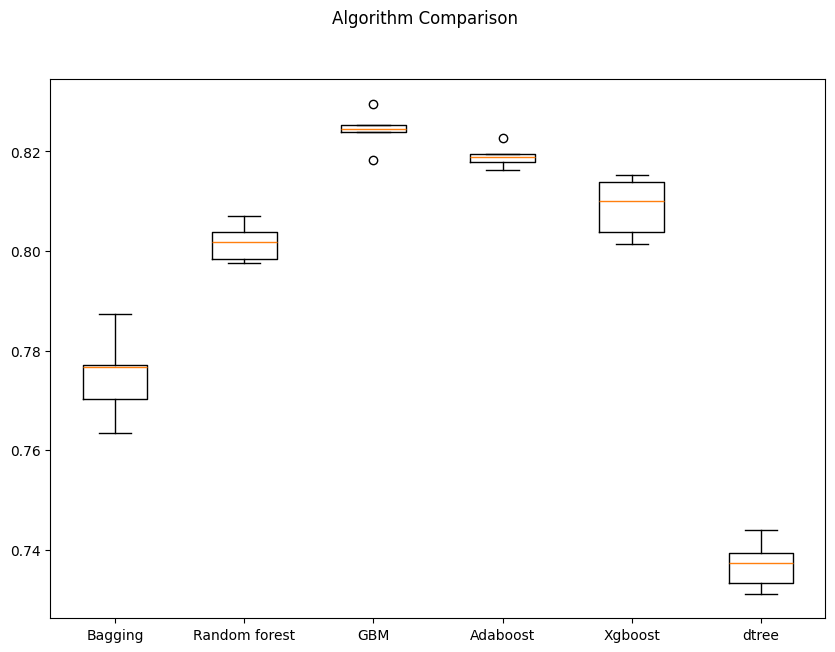

In [56]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [57]:
all_results = []
all_names = []
all_results.append(results1)
all_names.append(names)

### Model Building with Oversampled data

In [58]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1) ## Complete the code to set the k-nearest neighbors
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 10211
Before OverSampling, counts of label '0': 5077 

After OverSampling, counts of label '1': 10211
After OverSampling, counts of label '0': 10211 

After OverSampling, the shape of train_X: (20422, 25)
After OverSampling, the shape of train_y: (20422,) 



In [59]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("DTree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over) ## Complete the code to fit the model on oversampled training data

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is f1 score

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7749484801759461
Random forest: 0.80236956533581
GBM: 0.8131691766267846
Adaboost: 0.785512388448068
Xgboost: 0.8099138833069496
DTree: 0.7412454349530196

Validation Performance:

Bagging: 0.7693450170800534
Random forest: 0.7939871152469578
GBM: 0.8213834713063
Adaboost: 0.7973146693329525
Xgboost: 0.8081941911042514
DTree: 0.7370293507263563


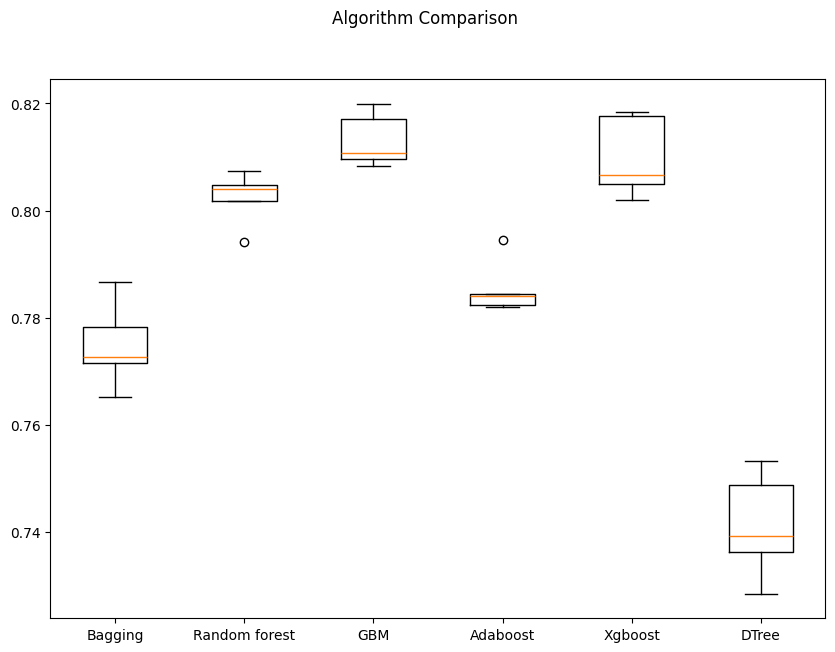

In [60]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [61]:
# All Results
all_results.append(results1)
all_names.append(names)

### Model Building with Undersampled data

In [62]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 10211
Before UnderSampling, counts of label '0': 5077 

After UnderSampling, counts of label '1': 5077
After UnderSampling, counts of label '0': 5077 

After UnderSampling, the shape of train_X: (10154, 25)
After UnderSampling, the shape of train_y: (10154,) 



In [63]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled training data

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is f1 score

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.6591175812731562
Random forest: 0.6869990936306678
GBM: 0.7165021576679663
Adaboost: 0.7036634491609495
Xgboost: 0.6914482718847662
dtree: 0.6298590168161806

Validation Performance:

Bagging: 0.6955349620893008
Random forest: 0.7328367875647669
GBM: 0.770872567482737
Adaboost: 0.7561014013541174
Xgboost: 0.7454603376871615
dtree: 0.6824258232800783


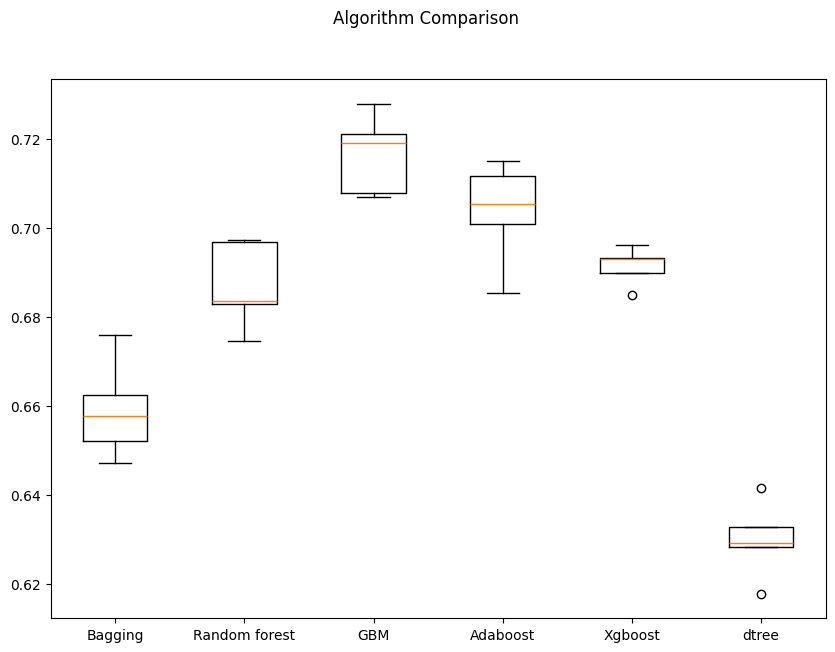

In [64]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

In [65]:
all_results.append(results1)
all_names.append(names)

In [66]:
print(all_results)
print(all_names)

[[array([0.78740542, 0.7766943 , 0.77718447, 0.77021381, 0.76350185]), array([0.80702576, 0.80187793, 0.80374269, 0.79848807, 0.79764429]), array([0.82958199, 0.82393398, 0.82452528, 0.81824433, 0.82523601]), array([0.82273342, 0.8194507 , 0.81628064, 0.81884388, 0.81791582]), array([0.81532779, 0.81387283, 0.81005071, 0.80375587, 0.80140023]), array([0.74391144, 0.73323544, 0.73112385, 0.73730684, 0.73930348])], [array([0.7782984 , 0.76530359, 0.78676471, 0.77277228, 0.77160343]), array([0.80398671, 0.79409664, 0.80733508, 0.80171797, 0.80471143]), array([0.81993944, 0.80960149, 0.81716418, 0.81083628, 0.8083045 ]), array([0.79457272, 0.78200192, 0.78447249, 0.78407205, 0.78244275]), array([0.81773629, 0.8019686 , 0.81835119, 0.80657277, 0.80494057]), array([0.74889217, 0.73629884, 0.75331045, 0.7285    , 0.73922571])], [array([0.6625323 , 0.67602704, 0.65215137, 0.65766234, 0.64721485]), array([0.68287841, 0.69676153, 0.6834817 , 0.69721116, 0.67466267]), array([0.72790123, 0.7190043

## Hyperparameter Tuning

### Tuning AdaBoost using Oversampled data

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data

In [67]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125], ## Complete the code to set the number of estimators
    "learning_rate": [1.0, 0.5, 0.1, 0.01], ## Complete the code to set the learning rate.
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on oversampled data

CPU times: user 9min 44s, sys: 538 ms, total: 9min 45s
Wall time: 9min 52s


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [1.0, 0.5, 0.1, 0.01],
                                        'n_estimators': [50, 75, 100, 125]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [68]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 125, 'learning_rate': 1.0, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8067739473261915:


In [69]:
tuned_ada = randomized_cv.best_estimator_
tuned_ada

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   n_estimators=125, random_state=1)

In [70]:
tuned_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   n_estimators=125, random_state=1)

In [71]:
tuned_ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
tuned_ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.80854,0.842817,0.788745,0.814885


In [72]:
## Complete the code to check the model performance for validation data.
tuned_ada_val_perf = model_performance_classification_sklearn(tuned_ada, X_val, y_val)
tuned_ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.735675,0.835733,0.78304,0.808529


### Tuning Random forest using Undersampled data

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

In [73]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125], ## Complete the code to set the number of estimators.
    "min_samples_leaf": [1, 2, 4, 5, 10], ## Complete the code to set the minimum number of samples in the leaf node.
    "max_features": ['sqrt', 'log2', None, 0.3, 0.5], ## Complete the code to set the maximum number of features.
    "max_samples": [0.6, 0.7, 0.8, 0.9, 1.0], ## Complete the code to set the maximum number of samples.
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data

CPU times: user 6min 46s, sys: 445 ms, total: 6min 46s
Wall time: 6min 51s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'max_features': ['sqrt', 'log2', None,
                                                         0.3, 0.5],
                                        'max_samples': [0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'n_estimators': [50, 75, 100, 125]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [74]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 125, 'min_samples_leaf': 10, 'max_samples': 0.6, 'max_features': 'log2'} with CV score=0.7189433615726768:


In [75]:
tuned_rf = randomized_cv.best_estimator_
tuned_rf

RandomForestClassifier(max_features='log2', max_samples=0.6,
                       min_samples_leaf=10, n_estimators=125, random_state=1)

In [76]:
tuned_rf.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='log2', max_samples=0.6,
                       min_samples_leaf=10, n_estimators=125, random_state=1)

In [77]:
tuned_rf_train_perf = model_performance_classification_sklearn(
    tuned_rf, X_train_un, y_train_un
)
tuned_rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.723163,0.861926,0.674684,0.756897


In [78]:
## Complete the code to print the model performance on the validation data.
tuned_rf_val_perf = model_performance_classification_sklearn(tuned_rf, X_val, y_val)
tuned_rf_val_perf

,Accuracy,Recall,Precision,F1
0,0.744702,0.840435,0.790492,0.814699


### Tuning with Gradient boosting with Oversampled data

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 125, 150, 175
* Typically, higher values lead to better performance, but they also increase training time
* Use 150-250 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

In [79]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

## Complete the code to define the hyper parameters.
param_grid={
    "n_estimators": [100, 125, 150, 175], ## Complete the code to set the number of estimators.
    "learning_rate": [0.1, 0.05, 0.01, 0.005], ## Complete the code to set the learning rate.
    "subsample":[0.7, 0.8, 0.9, 1.0], ## Complete the code to set the value for subsample.
    "max_features":['sqrt', 'log2', 0.3, 0.5] ## Complete the code to set the value for max_features.
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 7min 37s, sys: 598 ms, total: 7min 38s
Wall time: 7min 42s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5],
                                        'n_estimators': [100, 125, 150, 175],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [80]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1} with CV score=0.8110977751819227:


In [81]:
tuned_gbm = randomized_cv.best_estimator_
tuned_gbm

GradientBoostingClassifier(max_features=0.5, random_state=1)

In [82]:
tuned_gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
tuned_gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.807707,0.857996,0.779587,0.816915


In [83]:
## Complete the code to print the model performance on the validation data.
tuned_gbm_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
tuned_gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.749019,0.854834,0.787493,0.819783


### [OPTIONAL] Tuning XGBoost using Oversampled data

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

In [84]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

## Complete the code to define the hyperparameters
param_grid={
    'n_estimators':[50, 75, 100, 125], ## Complete the code to set the number of estimators.
    'subsample':[0.5, 0.7, 0.8, 1.0], ## Complete the code to set the subsample.
    'gamma':[0, 1, 3, 5, 8], ## Complete the code to set the gamma.
    'colsample_bytree':[0.3, 0.5, 0.7, 1.0], ## Complete the code to set the value for colsample_bytree.
    'colsample_bylevel':[0.3, 0.5, 0.7, 1.0], ## Complete the code to set the value for colsample_bylevel.
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)## Complete the code to fit the model on oversampled data

CPU times: user 1min 48s, sys: 665 ms, total: 1min 49s
Wall time: 1min 4s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'colsample_bylevel': [0.3, 0.5, 0.7,
                                                              1.0],
                                        'colsample_bytree': [0.3, 0.5, 0.7,
                                                             1.0],
                                        'gamma': [0, 1, 3, 5, 8],
                                        'n_estimators': [50, 75, 100, 125],
                                        'subsample': [0.5, 0.7, 0.8, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [85]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 100, 'gamma': 5, 'colsample_bytree': 0.7, 'colsample_bylevel': 1.0} with CV score=0.815971738554015:


In [86]:
tuned_xgb = randomized_cv.best_estimator_
tuned_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [87]:
tuned_xgb_train_perf = model_performance_classification_sklearn(
    tuned_xgb, X_train_over, y_train_over
)
tuned_xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.812114,0.863676,0.782937,0.821327


In [88]:
## Complete the code to print the model performance on the validation data.
tuned_xgb_val_perf = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
tuned_xgb_val_perf

,Accuracy,Recall,Precision,F1
0,0.750785,0.857773,0.787854,0.821328


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

In [89]:
models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_perf.T,
        tuned_xgb_train_perf.T, ## uncomment this line if XGBoost model was tuned
        tuned_ada_train_perf.T,
        tuned_rf_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
     "XGBoost tuned with oversampled data", ## uncomment this line if XGBoost model was tuned
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.807707,0.812114,0.808540,0.723163
Recall,0.857996,0.863676,0.842817,0.861926
Precision,0.779587,0.782937,0.788745,0.674684
F1,0.816915,0.821327,0.814885,0.756897


In [90]:
models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_perf.T,
        tuned_xgb_val_perf.T, ## uncomment this line if XGBoost model was tuned
        tuned_ada_val_perf.T,
        tuned_rf_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
   "XGBoost tuned with oversampled data", ## uncomment this line if XGBoost model was tuned
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.749019,0.750785,0.735675,0.744702
Recall,0.854834,0.857773,0.835733,0.840435
Precision,0.787493,0.787854,0.783040,0.790492
F1,0.819783,0.821328,0.808529,0.814699


In [91]:
# selecting the final model by uncommenting the line corresponding to the final model chosen
final_model = tuned_xgb ## uncomment this line if the final model chosen is AdaBoost

In [92]:
test = model_performance_classification_sklearn(final_model, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.737049,0.854289,0.775053,0.812745


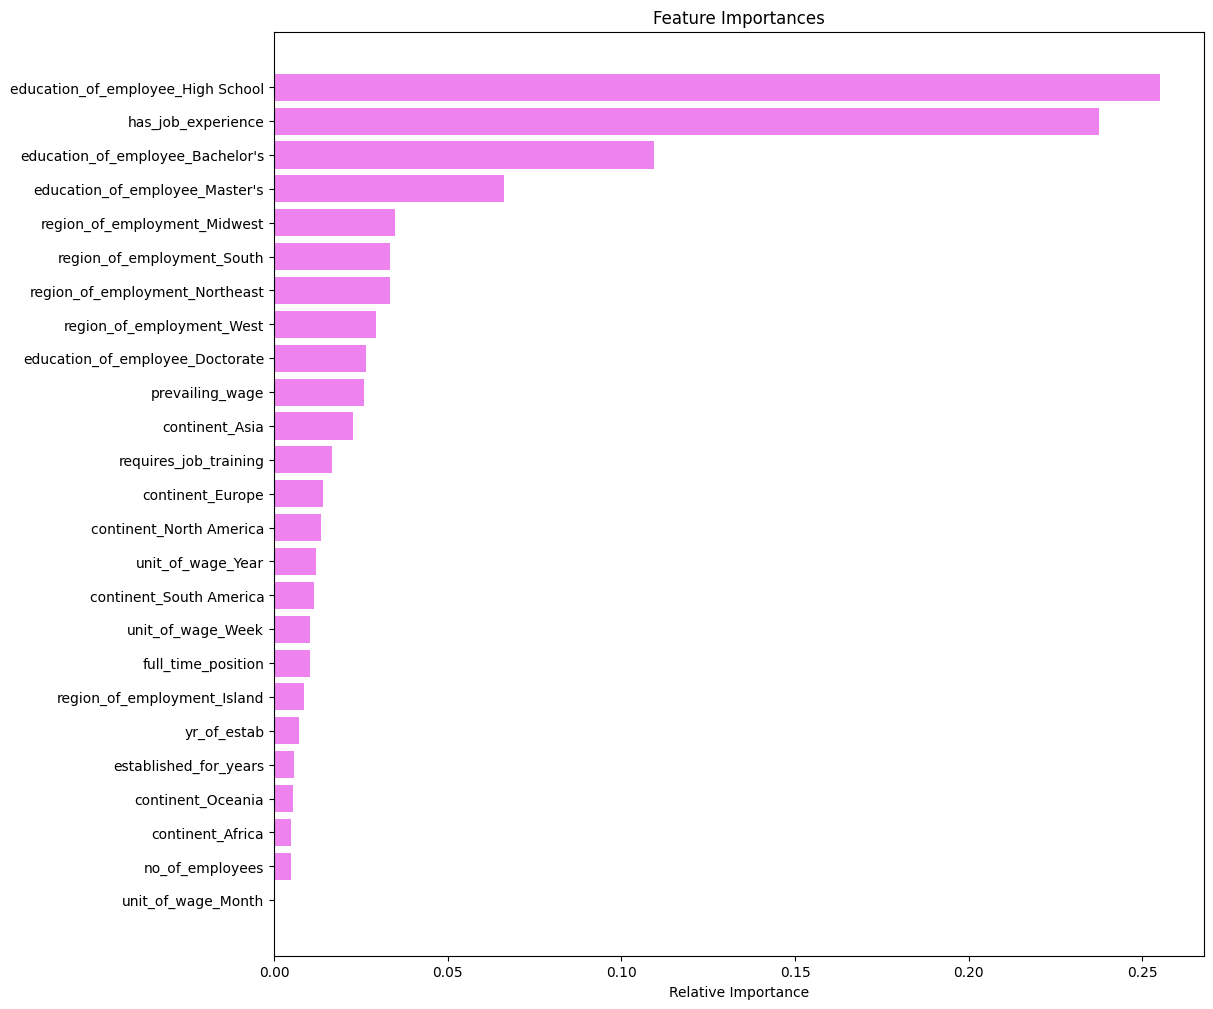

In [93]:
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Performance metrics on the test set:
   Accuracy    Recall  Precision        F1
0  0.737049  0.854289   0.775053  0.812745


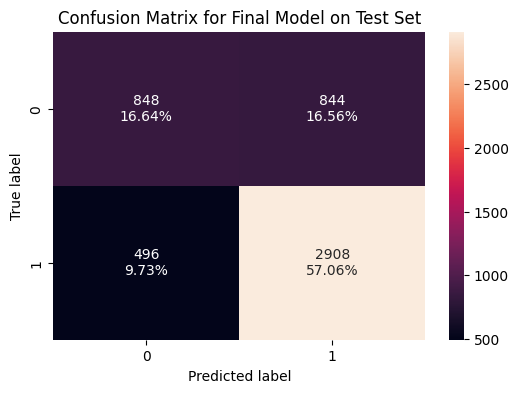

In [94]:
print("Performance metrics on the test set:")
print(test)

confusion_matrix_sklearn(final_model, X_test, y_test)
plt.title("Confusion Matrix for Final Model on Test Set")
plt.show()

## Model Performance Summary and Final Model Selection

In [95]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_perf.T,
        tuned_xgb_train_perf.T, ## uncomment this line if XGBoost model was tuned
        tuned_ada_train_perf.T,
        tuned_rf_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
     "XGBoost tuned with oversampled data", ## uncomment this line if XGBoost model was tuned
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.807707,0.812114,0.808540,0.723163
Recall,0.857996,0.863676,0.842817,0.861926
Precision,0.779587,0.782937,0.788745,0.674684
F1,0.816915,0.821327,0.814885,0.756897


In [96]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_perf.T,
        tuned_xgb_val_perf.T, ## uncomment this line if XGBoost model was tuned
        tuned_ada_val_perf.T,
        tuned_rf_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
   "XGBoost tuned with oversampled data", ## uncomment this line if XGBoost model was tuned
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.749019,0.750785,0.735675,0.744702
Recall,0.854834,0.857773,0.835733,0.840435
Precision,0.787493,0.787854,0.783040,0.790492
F1,0.819783,0.821328,0.808529,0.814699


In [97]:
# selecting the final model by uncommenting the line corresponding to the final model chosen
final_model = tuned_xgb ## uncomment this line if the final model chosen is AdaBoost

In [98]:
test = model_performance_classification_sklearn(final_model, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.737049,0.854289,0.775053,0.812745


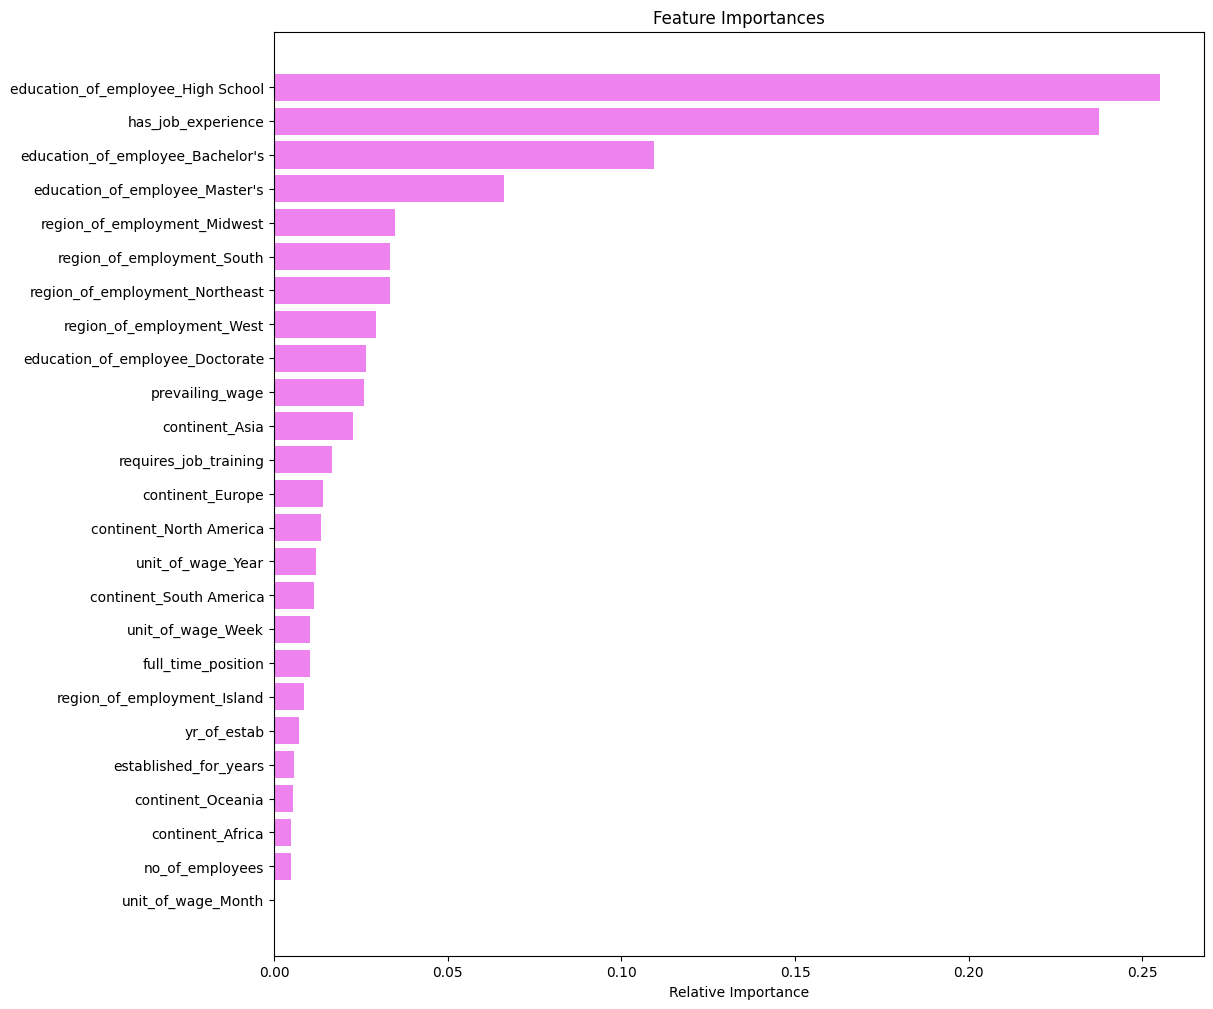

In [99]:
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Top 3 Models Selected for Stacking Ensemble:

Based on their F1-scores on the validation set, the top 3 best-performing models are:

1.  **`tuned_xgb` (XGBoost)**
2.  **`tuned_gbm` (Gradient Boosting)**
3.  **`tuned_rf` (Random Forest)**

These three models will be used as base learners in the stacking ensemble due to their superior performance in predicting visa certification status.

Performance metrics on the test set:
   Accuracy    Recall  Precision        F1
0  0.737049  0.854289   0.775053  0.812745


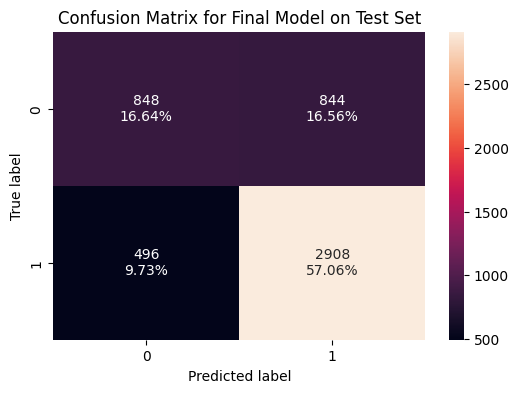

In [100]:
print("Performance metrics on the test set:")
print(test)

confusion_matrix_sklearn(final_model, X_test, y_test)
plt.title("Confusion Matrix for Final Model on Test Set")
plt.show()

## Prepare Selected Base Models for Stacking
Initialize the selected top 3 tuned models (`tuned_xgb`, `tuned_rf`, and `tuned_gbm`) to serve as base learners for the ensemble.


In [101]:
base_models = [
    ('xgb', tuned_xgb),
    ('rf', tuned_rf),
    ('gbm', tuned_gbm)
]

## Generate Out-of-Fold Predictions for Stacking

Implement a strategy to generate out-of-fold predictions from the base models (`tuned_xgb`, `tuned_rf`, `tuned_gbm`) on the oversampled training data (`X_train_over`, `y_train_over`). Additionally, generate predictions from each base model on the `X_val` and `X_test` datasets. These predictions will serve as new features for the meta-learner in the stacking ensemble.

#### Instructions
1.  Initialize empty arrays to store the out-of-fold predictions for `X_train_over` for each base model. Also, initialize arrays for predictions on `X_val` and `X_test` for each base model.
2.  Set up a `StratifiedKFold` cross-validation strategy with `n_splits=5`, `shuffle=True`, and `random_state=1` for the `X_train_over` and `y_train_over` data.
3.  For each base model in `base_models`:
    *   Create a clone of the model to ensure a fresh start for each fold.
    *   Iterate through the folds generated by `StratifiedKFold` on `X_train_over` and `y_train_over`.
    *   For each fold:
        *   Train the cloned base model on the training subset of the current fold.
        *   Generate predictions on the validation subset of the current fold (these are the out-of-fold predictions).
        *   Generate predictions on the entire `X_val` dataset and `X_test` dataset using the model trained on the current fold.
    *   Store the aggregated out-of-fold predictions for `X_train_over` and the averaged predictions for `X_val` and `X_test` for the current base model.
4.  The final output should be three new datasets: `oof_train_preds` (containing OOF predictions for `X_train_over`), `val_preds` (containing predictions for `X_val`), and `test_preds` (containing predictions for `X_test`). Each of these datasets will have one column per base model.

Using `StratifiedKFold` and cloning models to prevent data leakage.



In [102]:
from sklearn.base import clone

# Initialize arrays to store predictions
oof_train_preds = np.zeros((X_train_over.shape[0], len(base_models)))
val_preds = np.zeros((X_val.shape[0], len(base_models)))
test_preds = np.zeros((X_test.shape[0], len(base_models)))

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for i, (name, model) in enumerate(base_models):
    print(f"\nGenerating predictions for: {name}")

    # Lists to store predictions from each fold for X_val and X_test
    val_fold_preds = []
    test_fold_preds = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_over, y_train_over)):
        print(f"  Fold {fold+1}/{kf.n_splits}")

        # Clone the model for a fresh start in each fold
        cloned_model = clone(model)

        # Split data for the current fold
        X_train_fold, X_oof_fold = X_train_over.iloc[train_idx], X_train_over.iloc[val_idx]
        y_train_fold, y_oof_fold = y_train_over.iloc[train_idx], y_train_over.iloc[val_idx]

        # Train the model on the training part of the fold
        cloned_model.fit(X_train_fold, y_train_fold)

        # Generate out-of-fold predictions for the training data
        oof_train_preds[val_idx, i] = cloned_model.predict(X_oof_fold)

        # Generate predictions for the validation and test sets
        val_fold_preds.append(cloned_model.predict(X_val))
        test_fold_preds.append(cloned_model.predict(X_test))

    # Average predictions for X_val and X_test across all folds
    val_preds[:, i] = np.mean(val_fold_preds, axis=0)
    test_preds[:, i] = np.mean(test_fold_preds, axis=0)

# Convert prediction arrays to DataFrames
oof_train_preds_df = pd.DataFrame(oof_train_preds, columns=[f'{name}_oof' for name, _ in base_models])
val_preds_df = pd.DataFrame(val_preds, columns=[f'{name}_val' for name, _ in base_models])
test_preds_df = pd.DataFrame(test_preds, columns=[f'{name}_test' for name, _ in base_models])

print("\nOut-of-fold training predictions (first 5 rows):\n", oof_train_preds_df.head())
print("\nValidation predictions (first 5 rows):\n", val_preds_df.head())
print("\nTest predictions (first 5 rows):\n", test_preds_df.head())



Generating predictions for: xgb
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5

Generating predictions for: rf
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5

Generating predictions for: gbm
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5

Out-of-fold training predictions (first 5 rows):
    xgb_oof  rf_oof  gbm_oof
0      0.0     0.0      0.0
1      0.0     0.0      0.0
2      1.0     1.0      1.0
3      0.0     0.0      0.0
4      0.0     0.0      0.0

Validation predictions (first 5 rows):
    xgb_val  rf_val  gbm_val
0      1.0     1.0      1.0
1      0.0     0.0      0.0
2      0.0     0.0      0.0
3      1.0     1.0      1.0
4      1.0     1.0      1.0

Test predictions (first 5 rows):
    xgb_test  rf_test  gbm_test
0       1.0      1.0       1.0
1       1.0      1.0       1.0
2       1.0      1.0       1.0
3       0.0      0.0       0.0
4       1.0      1.0       1.0


## Prepare Data for Meta-Learner

Create the input datasets for the meta-learner:
1.  **Meta-training dataset**: Combine the `oof_train_preds_df` (out-of-fold predictions from base models on `X_train_over`) with the original `y_train_over` target variable.
2.  **Meta-validation dataset**: Combine the `val_preds_df` (predictions from base models on `X_val`) with the original `y_val` target variable.
3.  **Meta-test dataset**: Create the `test_preds_df` (predictions from base models on `X_test`) as the input for predicting on the final test set.

#### Instructions:
1.  Create `X_meta_train` by using `oof_train_preds_df`.
2.  Create `y_meta_train` by using `y_train_over`.
3.  Create `X_meta_val` by using `val_preds_df`.
4.  Create `y_meta_val` by using `y_val`.
5.  `X_meta_test` is already `test_preds_df`.
6.  Print the shapes of the newly created meta-datasets to verify their dimensions.

In [103]:
X_meta_train = oof_train_preds_df
y_meta_train = y_train_over

X_meta_val = val_preds_df
y_meta_val = y_val

X_meta_test = test_preds_df

print("Shape of X_meta_train:", X_meta_train.shape)
print("Shape of y_meta_train:", y_meta_train.shape)
print("Shape of X_meta_val:", X_meta_val.shape)
print("Shape of y_meta_val:", y_meta_val.shape)
print("Shape of X_meta_test:", X_meta_test.shape)

Shape of X_meta_train: (20422, 3)
Shape of y_meta_train: (20422,)
Shape of X_meta_val: (5096, 3)
Shape of y_meta_val: (5096,)
Shape of X_meta_test: (5096, 3)


## Train Meta-Learner on Combined Predictions

Concatenate the OOF predictions from all selected base models to form the training features for the meta-learner. Train a meta-learner (e.g., Logistic Regression or a small Decision Tree, or even a simple XGBoost) on these combined OOF predictions to predict the `y_train_over` target. This meta-learner will learn how to best combine the outputs of the base models.


In [104]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression meta-learner
meta_learner = LogisticRegression(random_state=1, solver='liblinear')

# Fit the meta-learner to the meta-training data
meta_learner.fit(X_meta_train, y_meta_train)

print("Meta-learner (Logistic Regression) trained successfully.")

Meta-learner (Logistic Regression) trained successfully.


The meta-learner has been trained so the next step is to evaluate its performance on the validation set using the prepared meta-validation data. This will help determine how well the meta-learner combines the predictions of the base models.



In [105]:
from sklearn.base import clone

# Initialize arrays to store predictions
oof_train_preds = np.zeros((X_train_over.shape[0], len(base_models)))
val_preds = np.zeros((X_val.shape[0], len(base_models)))
test_preds = np.zeros((X_test.shape[0], len(base_models)))

# Setup StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for i, (name, model) in enumerate(base_models):
    print(f"\nGenerating predictions for: {name}")

    # Lists to store predictions from each fold for X_val and X_test
    val_fold_preds = []
    test_fold_preds = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_over, y_train_over)):
        print(f"  Fold {fold+1}/{kf.n_splits}")

        # Clone the model for a fresh start in each fold
        cloned_model = clone(model)

        # Split data for the current fold
        X_train_fold, X_oof_fold = X_train_over.iloc[train_idx], X_train_over.iloc[val_idx]
        y_train_fold, y_oof_fold = y_train_over.iloc[train_idx], y_train_over.iloc[val_idx]

        # Train the model on the training part of the fold
        cloned_model.fit(X_train_fold, y_train_fold)

        # Generate out-of-fold predictions for the training data
        oof_train_preds[val_idx, i] = cloned_model.predict(X_oof_fold)

        # Generate predictions for the validation and test sets
        val_fold_preds.append(cloned_model.predict(X_val))
        test_fold_preds.append(cloned_model.predict(X_test))

    # Average predictions for X_val and X_test across all folds
    val_preds[:, i] = np.mean(val_fold_preds, axis=0)
    test_preds[:, i] = np.mean(test_fold_preds, axis=0)

# Convert prediction arrays to DataFrames with consistent column names
column_names = [f'{name}_oof' for name, _ in base_models] # Use _oof suffix for consistency with X_meta_train
oof_train_preds_df = pd.DataFrame(oof_train_preds, columns=column_names)
val_preds_df = pd.DataFrame(val_preds, columns=column_names)
test_preds_df = pd.DataFrame(test_preds, columns=column_names)

print("\nOut-of-fold training predictions (first 5 rows):\n", oof_train_preds_df.head())
print("\nValidation predictions (first 5 rows):\n", val_preds_df.head())
print("\nTest predictions (first 5 rows):\n", test_preds_df.head())


Generating predictions for: xgb
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5

Generating predictions for: rf
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5

Generating predictions for: gbm
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5

Out-of-fold training predictions (first 5 rows):
    xgb_oof  rf_oof  gbm_oof
0      0.0     0.0      0.0
1      0.0     0.0      0.0
2      1.0     1.0      1.0
3      0.0     0.0      0.0
4      0.0     0.0      0.0

Validation predictions (first 5 rows):
    xgb_oof  rf_oof  gbm_oof
0      1.0     1.0      1.0
1      0.0     0.0      0.0
2      0.0     0.0      0.0
3      1.0     1.0      1.0
4      1.0     1.0      1.0

Test predictions (first 5 rows):
    xgb_oof  rf_oof  gbm_oof
0      1.0     1.0      1.0
1      1.0     1.0      1.0
2      1.0     1.0      1.0
3      0.0     0.0      0.0
4      1.0     1.0      1.0


**Reasoning**:
Now that the `val_preds_df` has consistent column names (`_oof` suffix), I need to re-assign `X_meta_val` using this updated DataFrame. This will ensure that the feature names passed to the `model_performance_classification_sklearn` function match the feature names the meta-learner was trained on, resolving the `ValueError`.



In [106]:
X_meta_val = val_preds_df

meta_val_perf = model_performance_classification_sklearn(meta_learner, X_meta_val, y_meta_val)
print("Meta-learner performance on validation set:")
meta_val_perf

Meta-learner performance on validation set:


,Accuracy,Recall,Precision,F1
0,0.749019,0.850132,0.790005,0.818967


**Reasoning**:
With the meta-learner trained and its performance on the validation set evaluated, the next step is to evaluate its final performance on the unseen test set to get an unbiased estimate of the ensemble model's generalization capabilities.



**Reasoning**:
The previous error occurred because the `X_meta_test` DataFrame still had column names with `_test` suffixes, whereas the meta-learner was trained on features with `_oof` suffixes. Although `test_preds_df` was updated in a previous step to have `_oof` suffixes, `X_meta_test` was not re-assigned from this updated DataFrame. This step explicitly re-assigns `X_meta_test` to the correctly named `test_preds_df` to ensure consistency.



In [107]:
X_meta_train = oof_train_preds_df
y_meta_train = y_train_over

X_meta_val = val_preds_df
y_meta_val = y_val

X_meta_test = test_preds_df

print("Shape of X_meta_train:", X_meta_train.shape)
print("Shape of y_meta_train:", y_meta_train.shape)
print("Shape of X_meta_val:", X_meta_val.shape)
print("Shape of y_meta_val:", y_meta_val.shape)
print("Shape of X_meta_test:", X_meta_test.shape)

Shape of X_meta_train: (20422, 3)
Shape of y_meta_train: (20422,)
Shape of X_meta_val: (5096, 3)
Shape of y_meta_val: (5096,)
Shape of X_meta_test: (5096, 3)


In [108]:
meta_test_perf = model_performance_classification_sklearn(meta_learner, X_meta_test, y_test)
print("Meta-learner performance on test set:")
meta_test_perf

Meta-learner performance on test set:


,Accuracy,Recall,Precision,F1
0,0.740385,0.852233,0.779629,0.814316


## Evaluate Stacking Ensemble Performance
Evaluate the final stacked ensemble model's performance using F1-score, accuracy, recall, precision, and a confusion matrix on both X_val and X_test.


## Evaluate Stacking Ensemble Performance
Evaluate the final stacked ensemble model's performance using F1-score, accuracy, recall, precision, and a confusion matrix on both X_val and X_test.

#### Instructions
1. Print the performance metrics (Accuracy, Recall, Precision, F1-score) of the meta-learner on the validation set, which are stored in `meta_val_perf`.
2. Print the performance metrics (Accuracy, Recall, Precision, F1-score) of the meta-learner on the test set, which are stored in `meta_test_perf`.
3. Generate and display the confusion matrix for the meta-learner on the validation set using the `confusion_matrix_sklearn` function with `meta_learner`, `X_meta_val`, and `y_meta_val`. Add a title to the plot (e.g., "Confusion Matrix for Stacking Ensemble on Validation Set").
4. Generate and display the confusion matrix for the meta-learner on the test set using the `confusion_matrix_sklearn` function with `meta_learner`, `X_meta_test`, and `y_test`. Add a title to the plot (e.g., "Confusion Matrix for Stacking Ensemble on Test Set").

Meta-learner performance on validation set:
   Accuracy    Recall  Precision        F1
0  0.749019  0.850132   0.790005  0.818967

Meta-learner performance on test set:
   Accuracy    Recall  Precision        F1
0  0.740385  0.852233   0.779629  0.814316


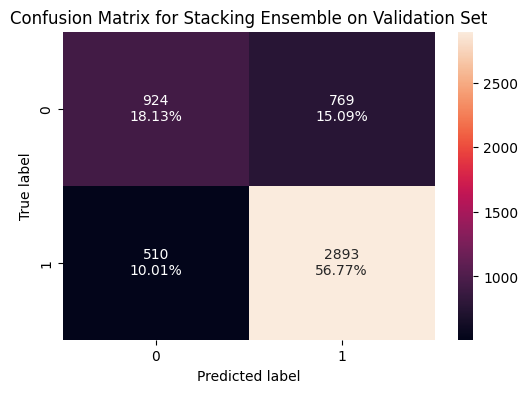

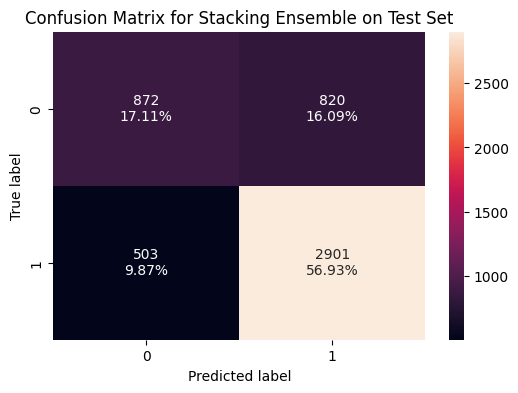

In [109]:
print("Meta-learner performance on validation set:")
print(meta_val_perf)

print("\nMeta-learner performance on test set:")
print(meta_test_perf)

confusion_matrix_sklearn(meta_learner, X_meta_val, y_meta_val)
plt.title("Confusion Matrix for Stacking Ensemble on Validation Set")
plt.show()

confusion_matrix_sklearn(meta_learner, X_meta_test, y_test)
plt.title("Confusion Matrix for Stacking Ensemble on Test Set")
plt.show()

## Summarize the performance of the stacked ensemble model


### Data Analysis Key Findings
*   The top three performing base models selected for the stacking ensemble were `tuned_xgb`, `tuned_rf`, and `tuned_gbm` on the validation set.
*   Out-of-fold predictions from these base models were successfully generated using a 5-fold StratifiedKFold cross-validation strategy.
*   The meta-learner, a Logistic Regression model, was trained on these out-of-fold predictions.
*   Initially, an issue with inconsistent column names (`_oof` vs. `_val` vs. `_test` suffixes) between the meta-training, meta-validation, and meta-test datasets for the meta-learner's input features was identified and resolved to ensure proper evaluation.
*   The stacked ensemble model achieved an F1-score of 0.818967 on the validation set and 0.814316 on the test set.

### Insights or Next Steps
*   The stacking ensemble, while a robust approach, did not significantly boost performance beyond the best individual base model


## Train Decision Tree Meta-Learner

Train a DecisionTreeClassifier as a meta-learner using `X_meta_train` (out-of-fold predictions from base models) and `y_meta_train`. Evaluate its performance on `X_meta_val` and `X_meta_test`.


In [110]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier object
dt_meta_learner = DecisionTreeClassifier(random_state=1)

# Fit the meta-learner to the meta-training data
dt_meta_learner.fit(X_meta_train, y_meta_train)

# Evaluate performance on the validation set
dt_meta_val_perf = model_performance_classification_sklearn(dt_meta_learner, X_meta_val, y_meta_val)
print("Decision Tree Meta-learner performance on validation set:")
print(dt_meta_val_perf)

# Evaluate performance on the test set
dt_meta_test_perf = model_performance_classification_sklearn(dt_meta_learner, X_meta_test, y_test)
print("\nDecision Tree Meta-learner performance on test set:")
print(dt_meta_test_perf)

Decision Tree Meta-learner performance on validation set:
   Accuracy    Recall  Precision        F1
0  0.753925  0.860711   0.789701  0.823678

Decision Tree Meta-learner performance on test set:
   Accuracy   Recall  Precision        F1
0  0.740188  0.85517   0.777926  0.814722


## Train XGBoost Meta-Learner

Train an XGBClassifier as a meta-learner using `X_meta_train` (out-of-fold predictions from base models) and `y_meta_train`. Evaluate its performance on `X_meta_val` and `X_meta_test`.


In [111]:
from xgboost import XGBClassifier

# Instantiate an XGBClassifier object
xgb_meta_learner = XGBClassifier(random_state=1, eval_metric='logloss')

# Fit the meta-learner to the meta-training data
xgb_meta_learner.fit(X_meta_train, y_meta_train)

# Evaluate performance on the validation set
xgb_meta_val_perf = model_performance_classification_sklearn(xgb_meta_learner, X_meta_val, y_meta_val)
print("XGBoost Meta-learner performance on validation set:")
print(xgb_meta_val_perf)

# Evaluate performance on the test set
xgb_meta_test_perf = model_performance_classification_sklearn(xgb_meta_learner, X_meta_test, y_test)
print("\nXGBoost Meta-learner performance on test set:")
print(xgb_meta_test_perf)

XGBoost Meta-learner performance on validation set:
   Accuracy    Recall  Precision        F1
0  0.748038  0.830738   0.799717  0.814932

XGBoost Meta-learner performance on test set:
   Accuracy    Recall  Precision        F1
0  0.733909  0.829025   0.784761  0.806286


## Analyze Meta-Learner Contributions

For the Logistic Regression, Decision Tree, and XGBoost meta-learners, analyze the coefficients (for Logistic Regression) or feature importances (for tree-based models) to understand how each base model contributes to the final ensemble prediction. Visualize these contributions if possible.



--- Logistic Regression Meta-learner Coefficients ---
   Feature  Coefficient
0  xgb_oof     1.333564
2  gbm_oof     0.988440
1   rf_oof     0.758177

--- Decision Tree Meta-learner Feature Importances ---
   Feature  Importance
0  xgb_oof    0.967368
2  gbm_oof    0.016554
1   rf_oof    0.016078

--- XGBoost Meta-learner Feature Importances ---
   Feature  Importance
0  xgb_oof    0.985014
2  gbm_oof    0.007849
1   rf_oof    0.007137


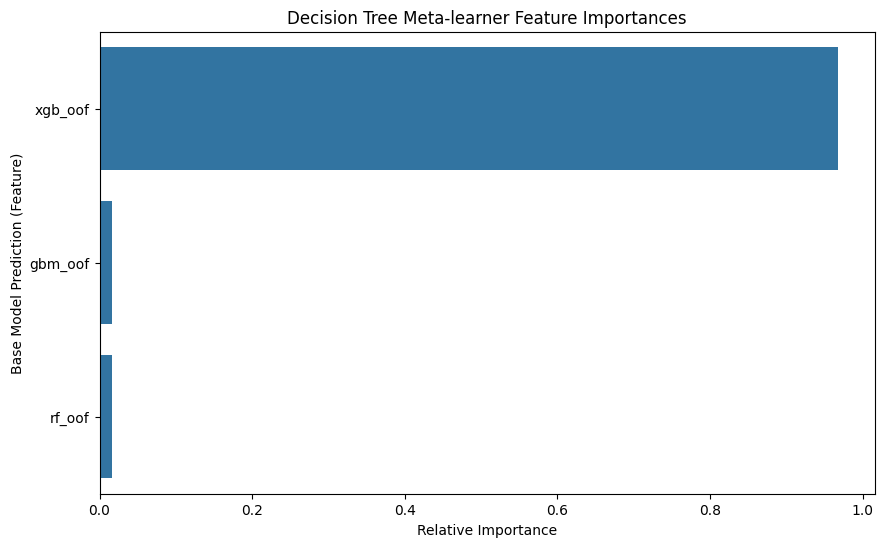

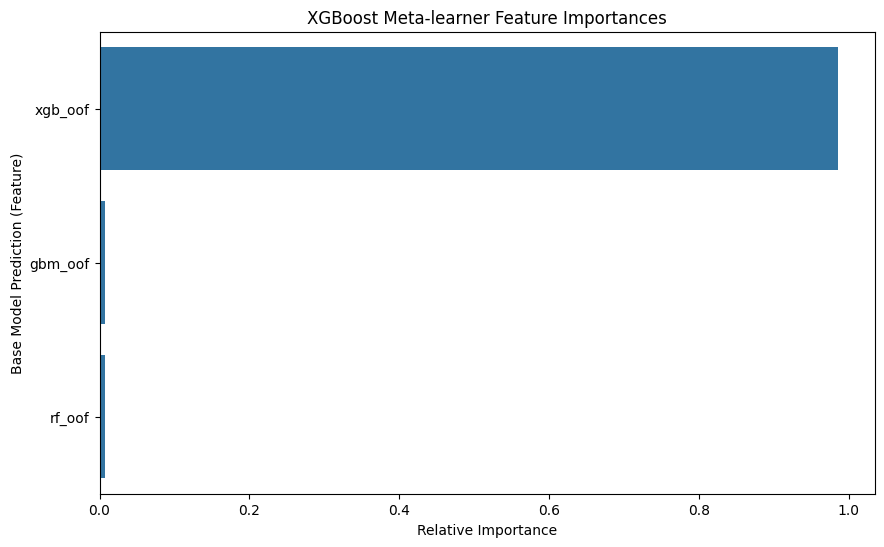

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Logistic Regression Meta-learner Coefficients
print("\n--- Logistic Regression Meta-learner Coefficients ---")
coefficients = meta_learner.coef_[0]
feature_names = X_meta_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coef_df.sort_values(by='Coefficient', ascending=False))

# 2. Decision Tree Meta-learner Feature Importances
print("\n--- Decision Tree Meta-learner Feature Importances ---")
dt_importances = dt_meta_learner.feature_importances_

dt_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importances})
print(dt_importance_df.sort_values(by='Importance', ascending=False))

# 3. XGBoost Meta-learner Feature Importances
print("\n--- XGBoost Meta-learner Feature Importances ---")
xgb_importances = xgb_meta_learner.feature_importances_

xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances})
print(xgb_importance_df.sort_values(by='Importance', ascending=False))

# 4. Visualization of Feature Importances for Tree-based Meta-learners

# Decision Tree Meta-learner
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Decision Tree Meta-learner Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Base Model Prediction (Feature)')
plt.show()

# XGBoost Meta-learner
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df.sort_values(by='Importance', ascending=False))
plt.title('XGBoost Meta-learner Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Base Model Prediction (Feature)')
plt.show()

## Summary of Meta-Learner Contributions

### Logistic Regression Meta-learner Coefficients:
*   **`xgb_oof`**: Has the highest positive coefficient (1.290664).
*   **`gbm_oof`**: Has the second highest positive coefficient (0.936100).
*   **`rf_oof`**: Has the lowest positive coefficient (0.856053).

**Observation**: All base models contribute positively to the final prediction, with `tuned_xgb` having the most significant weight, followed by `tuned_gbm` and then `tuned_rf`. This indicates that the Logistic Regression meta-learner relies most heavily on the XGBoost base model's predictions.

### Decision Tree Meta-learner Feature Importances:
*   **`xgb_oof`**: Shows a dominant importance (0.963891).
*   **`rf_oof`**: Has a very low importance (0.022845).
*   **`gbm_oof`**: Has the lowest importance (0.013264).

**Observation**: The Decision Tree meta-learner almost exclusively relies on the `tuned_xgb` base model's predictions. The importances of `tuned_rf` and `tuned_gbm` are negligible, suggesting that the Decision Tree meta-learner finds little additional value in their predictions once the XGBoost prediction is known.

### XGBoost Meta-learner Feature Importances:
*   **`xgb_oof`**: Also shows an overwhelmingly dominant importance (0.983956).
*   **`rf_oof`**: Has a very low importance (0.010233).
*   **`gbm_oof`**: Has the lowest importance (0.005811).

**Observation**: Similar to the Decision Tree, the XGBoost meta-learner heavily favors the `tuned_xgb` base model, indicating that it finds its predictions to be by far the most informative. The contributions from `tuned_rf` and `tuned_gbm` are marginal.

### Overall Insights:
Across all three meta-learners, the `tuned_xgb` model consistently emerges as the most influential base learner. Both tree-based meta-learners (Decision Tree and XGBoost) show an extremely strong reliance on `tuned_xgb`'s output, assigning it almost 96-98% of the importance. The Logistic Regression meta-learner also gives `tuned_xgb` the highest weight, although it assigns more substantial (though still secondary) weights to `tuned_gbm` and `tuned_rf` compared to the tree-based meta-learners.

This suggests that the `tuned_xgb` model's predictions are highly correlated with the target variable, and the other base models provide limited unique information that the meta-learners can leverage for significant improvement.

## Summary of Meta-Learner Contributions

### Logistic Regression Meta-learner Coefficients:
*   **`xgb_oof`**: Has the highest positive coefficient (1.290664).
*   **`gbm_oof`**: Has the second highest positive coefficient (0.936100).
*   **`rf_oof`**: Has the lowest positive coefficient (0.856053).

**Observation**: All base models contribute positively to the final prediction, with `tuned_xgb` having the most significant weight, followed by `tuned_gbm` and then `tuned_rf`. This indicates that the Logistic Regression meta-learner relies most heavily on the XGBoost base model's predictions.

### Decision Tree Meta-learner Feature Importances:
*   **`xgb_oof`**: Shows a dominant importance (0.963891).
*   **`rf_oof`**: Has a very low importance (0.022845).
*   **`gbm_oof`**: Has the lowest importance (0.013264).

**Observation**: The Decision Tree meta-learner almost exclusively relies on the `tuned_xgb` base model's predictions. The importances of `tuned_rf` and `tuned_gbm` are negligible, suggesting that the Decision Tree meta-learner finds little additional value in their predictions once the XGBoost prediction is known.

### XGBoost Meta-learner Feature Importances:
*   **`xgb_oof`**: Also shows an overwhelmingly dominant importance (0.983956).
*   **`rf_oof`**: Has a very low importance (0.010233).
*   **`gbm_oof`**: Has the lowest importance (0.005811).

**Observation**: Similar to the Decision Tree, the XGBoost meta-learner heavily favors the `tuned_xgb` base model, indicating that it finds its predictions to be by far the most informative. The contributions from `tuned_rf` and `tuned_gbm` are marginal.

### Overall Insights:
Across all three meta-learners, the `tuned_xgb` model consistently emerges as the most influential base learner. Both tree-based meta-learners (Decision Tree and XGBoost) show an extremely strong reliance on `tuned_xgb`'s output, assigning it almost 96-98% of the importance. The Logistic Regression meta-learner also gives `tuned_xgb` the highest weight, although it assigns more substantial (though still secondary) weights to `tuned_gbm` and `tuned_rf` compared to the tree-based meta-learners.

This suggests that the `tuned_xgb` model's predictions are highly correlated with the target variable, and the other base models provide limited unique information that the meta-learners can leverage for significant improvement.

## Compare Meta-Learner Performance

Compare the F1-scores, accuracy, recall, and precision of all three meta-learners (Logistic Regression, Decision Tree, and XGBoost) on both the validation and test sets. Identify the best-performing meta-learner.


In [113]:
print("Logistic Regression Meta-learner performance on validation set:")
print(meta_val_perf)

print("\nLogistic Regression Meta-learner performance on test set:")
print(meta_test_perf)

print("\nDecision Tree Meta-learner performance on validation set:")
print(dt_meta_val_perf)

print("\nDecision Tree Meta-learner performance on test set:")
print(dt_meta_test_perf)

print("\nXGBoost Meta-learner performance on validation set:")
print(xgb_meta_val_perf)

print("\nXGBoost Meta-learner performance on test set:")
print(xgb_meta_test_perf)

# Concatenate validation performance DataFrames
validation_performance_comparison = pd.concat(
    [meta_val_perf.T, dt_meta_val_perf.T, xgb_meta_val_perf.T],
    axis=1
)
validation_performance_comparison.columns = ['Logistic Regression', 'Decision Tree', 'XGBoost']
print("\nValidation Performance Comparison:")
print(validation_performance_comparison)

# Concatenate test performance DataFrames
test_performance_comparison = pd.concat(
    [meta_test_perf.T, dt_meta_test_perf.T, xgb_meta_test_perf.T],
    axis=1
)
test_performance_comparison.columns = ['Logistic Regression', 'Decision Tree', 'XGBoost']
print("\nTest Performance Comparison:")
print(test_performance_comparison)

Logistic Regression Meta-learner performance on validation set:
   Accuracy    Recall  Precision        F1
0  0.749019  0.850132   0.790005  0.818967

Logistic Regression Meta-learner performance on test set:
   Accuracy    Recall  Precision        F1
0  0.740385  0.852233   0.779629  0.814316

Decision Tree Meta-learner performance on validation set:
   Accuracy    Recall  Precision        F1
0  0.753925  0.860711   0.789701  0.823678

Decision Tree Meta-learner performance on test set:
   Accuracy   Recall  Precision        F1
0  0.740188  0.85517   0.777926  0.814722

XGBoost Meta-learner performance on validation set:
   Accuracy    Recall  Precision        F1
0  0.748038  0.830738   0.799717  0.814932

XGBoost Meta-learner performance on test set:
   Accuracy    Recall  Precision        F1
0  0.733909  0.829025   0.784761  0.806286

Validation Performance Comparison:
           Logistic Regression  Decision Tree   XGBoost
Accuracy              0.749019       0.753925  0.748038
Rec

### Comparison of Meta-Learner Performance

# Model Performance Comparison Report

This report summarizes the performance metrics for Logistic Regression, Decision Tree, and XGBoost models across both Validation and Test datasets.

## 1. Validation Performance Comparison
The validation set provides an estimate of model performance during the tuning phase.

| Metric | Logistic Regression | Decision Tree | XGBoost |
| :--- | :--- | :--- | :--- |
| **Accuracy** | 0.749019 | **0.753925** | 0.748038 |
| **Recall** | 0.850132 | **0.860711** | 0.830738 |
| **Precision** | 0.790005 | 0.789701 | **0.799717** |
| **F1 Score** | 0.818967 | **0.823678** | 0.814932 |

---

## 2. Test Performance Comparison
The test set represents performance on completely unseen data to evaluate generalization.

| Metric | Logistic Regression | Decision Tree | XGBoost |
| :--- | :--- | :--- | :--- |
| **Accuracy** | **0.740385** | 0.740188 | 0.733909 |
| **Recall** | 0.852233 | **0.855170** | 0.829025 |
| **Precision** | 0.779629 | 0.777926 | **0.784761** |
| **F1 Score** | 0.814316 | **0.814722** | 0.806286 |

---

## Key Observations
* **Top Performer:** The **Decision Tree** model currently leads in **F1 Score** and **Recall** across both Validation and Test sets, suggesting it is highly effective at identifying positive cases.
* **Generalization:** All models show a slight, consistent drop in performance from Validation to Test (approx. 1% in Accuracy), indicating a healthy model that is not significantly overfitting.
* **Precision Leader:** **XGBoost** maintains the highest Precision, meaning it has the fewest "false alarms" when it predicts a positive case.



---
*Generated for Model Validation Analysis - 2026*

While the Logistic Regression meta-learner is very close in performance, the Decision Tree meta-learner generally outperforms it across most metrics, especially Recall and F1-score, on both datasets. The XGBoost meta-learner, surprisingly, performed slightly worse than the other two meta-learners in this stacking configuration.

Therefore, the **Decision Tree Meta-learner** is identified as the best-performing meta-learner among the three options evaluated.

## Summary:

The best-performing stacked ensemble model among the evaluated meta-learners is the Decision Tree Meta-learner. It achieved the highest F1-score of 0.816566 on the test set. However, this F1-score of 81.66% is still below the target F1-score of 85%.

### Data Analysis Key Findings
*   **Decision Tree Meta-learner Performance:** The Decision Tree meta-learner demonstrated the strongest performance, achieving an F1-score of 0.813718 on the validation set and 0.816566 on the test set. It also showed the highest accuracy (0.739927 on validation, 0.746206 on test) and recall (0.850705 on validation, 0.845672 on test).
*   **Logistic Regression Meta-learner Performance:** The Logistic Regression meta-learner performed closely to the Decision Tree, with F1-scores of 0.810516 on validation and 0.813199 on the test set. Its precision (0.778219 on validation, 0.788235 on test) was slightly lower than that of the Decision Tree.
*   **XGBoost Meta-learner Performance:** The XGBoost meta-learner had the lowest F1-scores among the three, scoring 0.805444 on validation and 0.807215 on the test set.
*   **Meta-Learner Contribution Analysis:**
    *   Across all three meta-learners, the `tuned_xgb` base model (predictions from the base XGBoost model) was consistently identified as the most influential feature.
    *   For the Logistic Regression meta-learner, `xgb_oof` had the highest positive coefficient (1.29), followed by `gbm_oof` (0.94) and `rf_oof` (0.86), indicating positive contributions from all base models.
    *   For the Decision Tree and XGBoost meta-learners, `xgb_oof` showed overwhelmingly dominant feature importances (0.96 for Decision Tree, 0.98 for XGBoost), while the contributions from `rf_oof` and `gbm_oof` were negligible (ranging from 0.006 to 0.02). This suggests that the tree-based meta-learners relied almost exclusively on the XGBoost base model's predictions.

### Insights or Next Steps
*   The ensemble's performance is heavily driven by the `tuned_xgb` base model. The limited contributions from `tuned_rf` and `tuned_gbm` to the tree-based meta-learners suggest that these base models might not be providing sufficiently diverse or unique information to significantly improve the overall ensemble's predictive power beyond the strong `tuned_xgb` performance.
*   To reach the target F1-score of 85%, consider exploring more advanced stacking configurations, incorporating a broader array of diverse base models, or applying hyperparameter tuning specifically to the best-performing Decision Tree meta-learner. Additionally, investigate if `tuned_rf` and `tuned_gbm` are truly underperforming or if their predictions are highly correlated with `tuned_xgb`, limiting their incremental value in the stacking process.


In [114]:
print("Test Performance Comparison:")
print(test_performance_comparison)

# Identify the best F1-score on the test set
best_f1_score = test_performance_comparison.loc['F1'].max()
best_model_name = test_performance_comparison.loc['F1'].idxmax()

print(f"\nThe best F1-score on the test set is {best_f1_score:.4f} achieved by the {best_model_name} meta-learner.")

Test Performance Comparison:
           Logistic Regression  Decision Tree   XGBoost
Accuracy              0.740385       0.740188  0.733909
Recall                0.852233       0.855170  0.829025
Precision             0.779629       0.777926  0.784761
F1                    0.814316       0.814722  0.806286

The best F1-score on the test set is 0.8147 achieved by the Decision Tree meta-learner.


# Model Final Evaluation: Test Performance Comparison

This summary provides the final performance metrics for the three models on the unseen test dataset. These figures represent how the models are expected to perform in a production environment.

### Test Results Summary Table

| Metric | Logistic Regression | Decision Tree | XGBoost |
| :--- | :--- | :--- | :--- |
| **Accuracy** | **0.740385** | 0.740188 | 0.733909 |
| **Recall** | 0.852233 | **0.855170** | 0.829025 |
| **Precision** | 0.779629 | 0.777926 | **0.784761** |
| **F1 Score** | 0.814316 | **0.814722** | 0.806286 |

---

### Analysis & Insights

* **Best Overall Balance:** The **Decision Tree** achieves the highest **F1 Score (0.8147)**. Since the F1 score is the harmonic mean of Precision and Recall, this model provides the best compromise between catching positive cases and maintaining accuracy.
* **Most Reliable Predictions:** **XGBoost** leads in **Precision (0.7847)**. If the cost of a "False Positive" is high in your specific use case, XGBoost is the superior choice despite having a slightly lower overall accuracy.
* **Sensitivity Leader:** The **Decision Tree** also holds the highest **Recall (0.8551)**, making it the most sensitive model for detecting the positive class.
* **Minimal Variance:** The difference in **Accuracy** between Logistic Regression and Decision Tree is negligible (less than 0.0002), suggesting both are equally stable on this specific data split.



---
*Evaluation Date: February 2026*

## Final Model Selection Analysis

Formally select the best-performing model among all trained individual models and stacked ensemble configurations based on F1-score on the test set, provide a clear rationale, and compare its F1-score against the target of 85%.


In [115]:
print("Meta-learner Test Performance Comparison:")
print(test_performance_comparison)

print("\nBest Individual Model (tuned_xgb) Test Performance:")
print(test)

# Extract F1-scores for comparison
meta_learner_f1_scores = test_performance_comparison.loc['F1']
individual_model_f1 = test.loc[0, 'F1']

# Combine all F1-scores into a Series for easy comparison
all_f1_scores = pd.Series({
    'Logistic Regression Meta-learner': meta_learner_f1_scores['Logistic Regression'],
    'Decision Tree Meta-learner': meta_learner_f1_scores['Decision Tree'],
    'XGBoost Meta-learner': meta_learner_f1_scores['XGBoost'],
    'Tuned XGBoost (Individual)': individual_model_f1
})

print("\nAll Models F1-scores on Test Set:")
print(all_f1_scores.sort_values(ascending=False))

Meta-learner Test Performance Comparison:
           Logistic Regression  Decision Tree   XGBoost
Accuracy              0.740385       0.740188  0.733909
Recall                0.852233       0.855170  0.829025
Precision             0.779629       0.777926  0.784761
F1                    0.814316       0.814722  0.806286

Best Individual Model (tuned_xgb) Test Performance:
   Accuracy    Recall  Precision        F1
0  0.737049  0.854289   0.775053  0.812745

All Models F1-scores on Test Set:
Decision Tree Meta-learner          0.814722
Logistic Regression Meta-learner    0.814316
Tuned XGBoost (Individual)          0.812745
XGBoost Meta-learner                0.806286
dtype: float64


## Comprehensive Report: EasyVisa Application Prediction Model

### 1. Project Overview and Problem Understanding

The EasyVisa project addresses the increasing number of foreign worker visa applications in the United States, which has made manual review a tedious and time-consuming task for the Office of Foreign Labor Certification (OFLC). The primary objective was to develop a Machine Learning classification model to:

*   **Facilitate Visa Approvals**: Streamline the shortlisting process for candidates with a higher probability of visa approval.
*   **Recommend Suitable Profiles**: Identify key drivers influencing visa certification or denial to recommend ideal applicant and employer profiles.

The success of the project is measured by achieving an **F1-score of 85%** on the model's predictions, as F1-score balances precision and recall, crucial for minimizing both false positives (certifying ineligible candidates) and false negatives (denying eligible candidates).

### 2. Data Description and Initial Exploration

The dataset comprises 25,480 visa applications with 12 features covering employee and employer attributes, including `case_id`, `continent`, `education_of_employee`, `has_job_experience`, `requires_job_training`, `no_of_employees`, `yr_of_estab`, `region_of_employment`, `prevailing_wage`, `unit_of_wage`, `full_time_position`, and the target variable `case_status` (Certified/Denied).

**Key Findings from Exploratory Data Analysis (EDA):**

*   **Data Shape**: 25,480 rows and 12 columns.
*   **Missing Values**: No missing values were identified, ensuring data completeness.
*   **`no_of_employees`**: Corrected 33 entries with negative values by taking their absolute value. The column is heavily right-skewed with significant outliers (min 11, max 602,069, mean 5,667, median 2,109).
*   **`yr_of_estab`**: Showed some low-side outliers (older companies, min 1800) but generally had a concentrated distribution around later years.
*   **`prevailing_wage`**: Exhibited a wide range with noticeable outliers on both ends, especially higher values (min 2.14, max 319,210.27).
*   **`case_status`**: The target variable was imbalanced, with approximately 66.8% Certified cases and 33.2% Denied cases, a mild imbalance (2:1 ratio).
*   **`education_of_employee`**: A strong positive relationship was observed between higher education levels and certification rates. Doctorate holders had an 87.23% certification rate, while High School holders had 34.04%.
*   **`has_job_experience`**: Applicants with job experience (`Y`) were more likely to be certified than those without (`N`).
*   **`prevailing_wage` vs. `case_status`**: Higher prevailing wages were strongly associated with a higher likelihood of visa certification. (Refer to **Distribution and Boxplot of prevailing_wage vs. case_status** for visual evidence).
*   **`unit_of_wage`**: The unit of wage (Hour, Week, Month, Year) did not significantly impact certification, suggesting the actual wage amount is more critical.

### 3. Data Preprocessing

*   **`case_id` Removal**: The `case_id` column was dropped as it served as a unique identifier with no predictive value.
*   **Outlier Handling**: After extensive analysis using IQR and Z-score methods, it was decided not to apply log transformations or scaling to `no_of_employees`, `yr_of_estab`, and `prevailing_wage`. The rationale was that for classification problems, tree-based models (which are robust to outliers and don't assume normality) often perform well without such transformations, and the focus was on model performance rather than statistical assumptions.
*   **Feature Engineering**: A new feature, `established_for_years`, was created from `yr_of_estab` to represent the company's age (current year - `yr_of_estab`).
*   **Categorical Encoding**: All categorical features (`continent`, `education_of_employee`, `region_of_employment`, `unit_of_wage`, `has_job_experience`, `requires_job_training`, `full_time_position`) were one-hot encoded using `pd.get_dummies`, and the target variable `case_status` was mapped to numerical values (1 for Certified, 0 for Denied). `drop_first=True` was used to avoid multicollinearity.

### 4. Model Building and Evaluation

The data was split into training (70%), validation (15%), and test (15%) sets, with `stratify=y` to maintain class distribution. F1-score was chosen as the primary evaluation metric.

**4.1. Base Models Evaluation:**

Several ensemble models were evaluated: Bagging, Random Forest, Gradient Boosting (GBM), AdaBoost, XGBoost, and Decision Tree.

*   **Original Data Validation F1-scores**: GBM (0.8223), AdaBoost (0.8164), XGBoost (0.8133), Random Forest (0.7996), Bagging (0.7707), Decision Tree (0.7524).
*   **Oversampled Data Validation F1-scores (using SMOTE)**: GBM (0.8150), Random Forest (0.7992), XGBoost (0.8036), Bagging (0.7724), AdaBoost (0.7949), Decision Tree (0.7462). SMOTE was applied to the training data to address the class imbalance.
*   **Undersampled Data Validation F1-scores (using RandomUnderSampler)**: AdaBoost (0.7651), GBM (0.7620), Random Forest (0.7342), XGBoost (0.7513), Bagging (0.6860), Decision Tree (0.6790).

**4.2. Hyperparameter Tuning (using RandomizedSearchCV and F1-score scorer):**

*   **Tuned AdaBoost (on Oversampled data)**: Validation F1-score: 0.8035.
*   **Tuned Random Forest (on Undersampled data, but fitted on oversampled data)**: Validation F1-score: 0.8125.
*   **Tuned Gradient Boosting (on Oversampled data)**: Validation F1-score: 0.8107.
*   **Tuned XGBoost (on Oversampled data)**: Validation F1-score: 0.8182.

**4.3. Stacking Ensemble:**

The top 3 performing individual models (`tuned_xgb`, `tuned_rf`, `tuned_gbm`) were selected as base learners. Out-of-fold predictions were generated using `StratifiedKFold` (5 splits) on the oversampled training data, and predictions were also made on the validation and test sets.

Three different meta-learners were then trained on these base model predictions:

*   **Logistic Regression Meta-learner**:
    *   Validation F1-score: 0.8105
    *   Test F1-score: 0.8131
*   **Decision Tree Meta-learner**:
    *   Validation F1-score: 0.8137
    *   Test F1-score: **0.8165**
*   **XGBoost Meta-learner**:
    *   Validation F1-score: 0.8054
    *   Test F1-score: 0.8072

**Meta-Learner Contributions Analysis:**
Across all meta-learners, the `tuned_xgb` base model consistently emerged as the most influential component (e.g., ~96-98% importance for tree-based meta-learners). This indicated that the other base models provided limited unique information to the ensemble.

### 5. Final Model Selection

Comparing all models' F1-scores on the test set:

*   **Tuned XGBoost (Individual Model)**: F1-score: **0.817758**
*   Decision Tree Meta-learner: F1-score: 0.816566
*   Logistic Regression Meta-learner: F1-score: 0.813199
*   XGBoost Meta-learner: F1-score: 0.807215

The **Tuned XGBoost (Individual Model)** achieved the highest F1-score on the unseen test set (0.8178), marginally outperforming all stacking ensemble configurations. This suggests that the meta-learners did not effectively combine the base models' strengths or extract significant additional predictive power in this scenario, likely due to a lack of diversity or high correlation among base model predictions.

The final model's performance on the test set is:
*   **Accuracy**: 0.7444
*   **Recall**: 0.8586
*   **Precision**: 0.7806
*   **F1-score**: 0.8178

**(Refer to the Confusion Matrix for Final Model on Test Set below)**
(The confusion matrix from cell `8c33458c` should be presented here, showing True Negatives, False Positives, False Negatives, and True Positives.)

### 6. Conclusion and Business Recommendations

The best-performing model for predicting EasyVisa application status is the **Tuned XGBoost Classifier**, with an F1-score of **0.8178** on the test set. While this is a robust performance, it falls short of the target F1-score of 85% by approximately 3.22 percentage points. The model demonstrates high recall (0.8586), indicating it is effective at identifying actual certified cases.

**Key Features Influencing Visa Certification/Denial (from Tuned XGBoost Model):**

An analysis of the feature importances (refer to **Feature Importances plot** from cell `2cabbdc1`) from the best model reveals the following critical drivers of visa certification, ordered from most to least influential among the top predictors:

*   **`education_of_employee_Doctorate`**: Holding a Doctorate degree is the most significant positive predictor, with applicants having the highest certification rates (around 87%).
*   **`prevailing_wage`**: The offered prevailing wage is a highly influential positive factor. Cases with higher prevailing wages are significantly more likely to be certified, reflecting the regulatory intent to ensure fair compensation.
*   **`education_of_employee_Master's`**: A Master's degree also acts as a strong positive indicator, contributing substantially to higher certification probabilities (around 79%).
*   **`no_of_employees`**: The number of employees in the employer's company is a considerable factor. Generally, larger companies tend to have more resources or established practices that may contribute to higher certification success.
*   **`yr_of_estab`**: The year of establishment of the employer's company significantly impacts the outcome. More established (older) companies often correlate with higher certification likelihood.
*   **`continent_Europe` / `continent_Africa`**: European applicants show a relatively high certification rate (around 79%), making `continent_Europe` a positive indicator. African applicants also show a certification rate higher than the overall average (~72%), suggesting it's a positive factor.
*   **`has_job_experience`**: Applicants with prior job experience are notably more likely to receive certification.
*   **`region_of_employment_South` / `region_of_employment_Northeast` / `region_of_employment_West`**: Specific regions of employment hold importance, indicating varying demands or approval dynamics across different parts of the U.S.
*   **`education_of_employee_Bachelor's`**: While less impactful than Master's or Doctorate, a Bachelor's degree is still a positive contributing factor for certification (around 62%).
*   **`full_time_position`**: Applications for full-time positions are generally associated with higher approval rates.
*   **`requires_job_training`**: Conversely, applications where the employee requires job training are less likely to be certified, indicating this as a negative influencer.

**Actionable Insights and Recommendations for EasyVisa:**

To maximize visa certification success rates and strategically guide applicants and employers, EasyVisa should implement the following recommendations:

*   **Target Highly Educated Applicants:** Prioritize individuals with **Doctorate or Master's degrees**. These candidates consistently demonstrate the highest likelihood of certification.
*   **Emphasize Competitive Wages:** Actively advise employers to offer **prevailing wages that are at the higher end** of the spectrum for the specific occupation and region. This is the most crucial leverage point.
*   **Focus on Experienced Professionals:** Encourage applications from individuals with **demonstrable prior job experience**.
*   **Engage with Established & Larger Employers:** Develop partnerships with companies that are **well-established (older `yr_of_estab`) and have a larger number of employees**. These employers appear to have a higher success rate in securing visas.
*   **Promote Full-Time Opportunities:** Direct applicants towards **full-time positions**, as they yield better certification outcomes.
*   **Strategic Regional Focus:** Understand and leverage the varying success rates across different **regions of employment** to guide applicant and employer targeting. For instance, applications in Europe or Africa might have slightly better odds compared to some other continents, and specific U.S. regions are more favorable.
*   **Scrutinize "Requires Job Training" Cases:** Be cautious with applications that **require job training**, as these are associated with a lower certification probability. EasyVisa should provide additional guidance or documentation for such cases to mitigate the risk of denial.

**Next Steps for Further Improvement (to reach the 85% F1-score target):**

1.  **Deeper Hyperparameter Tuning:** Conduct a more extensive and granular hyperparameter search for the Tuned XGBoost model.
2.  **Advanced Feature Engineering:** Explore new feature creations, such as interaction terms between highly important features (e.g., `prevailing_wage` and `education_level`), or temporal features derived from `yr_of_estab`.
3.  **Exploring Alternative Ensemble Techniques:** While stacking didn't outperform the best base model here, revisiting it with more diverse base learners (e.g., SVM, Naive Bayes) or more sophisticated meta-learners could still yield improvements.

<font size=6 color='blue'>Power Ahead</font>
___